# Title- Titanic: Machine Learning from Disaster

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Practice Skills
###### Binary classification 
---

-

---
### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset
##### for this problem we will be loading training set and test  from two files as given by kaggle 

In [1]:
import os
import math
import datetime
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple,load_dataset,detect_outliers

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

pd.set_option('display.width', 120)
pd.set_option('precision', 4)

sns.set_style("whitegrid")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.color_palette('pastel')

[(0.5725490196078431, 0.7764705882352941, 1.0),
 (0.592156862745098, 0.9411764705882353, 0.6666666666666666),
 (1.0, 0.6235294117647059, 0.6039215686274509),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.6901960784313725, 0.8784313725490196, 0.9019607843137255)]

In [2]:
load_app_config()
DIRECTORY="kaggle_titanic"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'Survived'
input_path = get_datafolder_path()

train_file = os.path.join(input_path, DIRECTORY, TRAIN_FILE)
test_file = os.path.join(input_path, DIRECTORY, TEST_FILE)
print(train_file)
print(test_file)

train_dataset,feature_columns,response_column,continuous_vars,categorical_vars = load_dataset(train_file,RESPONSE)
test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars  = load_dataset(test_file,RESPONSE,colseparator=',')

train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]
test_X  = test_dataset[tfeature_columns]

Adding F:\MachineLearning  to system path
Adding F:\DataSource  to system path
F:\DataSource\kaggle_titanic\train.csv
F:\DataSource\kaggle_titanic\test.csv
 input file is :F:\DataSource\kaggle_titanic\train.csv loaded.
Continous Variables
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
 input file is :F:\DataSource\kaggle_titanic\test.csv loaded.
Continous Variables
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### 2.Summarize Data 
#### a) Descriptive statistics
#### b) Data visualizations


In [3]:
Outliers_to_drop = detect_outliers(train_dataset,2,["Age","SibSp","Parch","Fare"])
train_dataset.loc[Outliers_to_drop] # Show the outliers rows
Outliers_to_drop

F:\Anaconda2\envs\machinelearning\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


[27, 159, 180, 201, 792, 324, 846, 341, 863, 88]

In [4]:
train_dataset = train_dataset.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
train_y = train_dataset[response_column]
print(train_dataset.shape)
print(train_y.shape)

(881, 12)
(881, 1)


In [5]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*50,"info"))
    print(input_dataset.info())
    print("<{0} {1} {0}>".format("="*50,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*50,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*45,"Descriptive Statistics-X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*45,"Descriptive Statistics-y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*50,"value_count-y"))
 
    print(y.groupby(response_column)[response_column].count())

display_data_descriptives(train_dataset,train_X,feature_columns,train_y,response_column)

check_null = train_dataset.isnull().sum()[train_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*50,"null value count"))
print(check_null)
train_dataset.head() 

<================================================== info ==================================================>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB
None
<================================================== feature columns ==================================================>
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<================================================== response ===============

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Gender distribution of Passengers - Training set

Sex     Survived
female  0            78
        1           231
male    0           463
        1           109
Name: PassengerId, dtype: int64


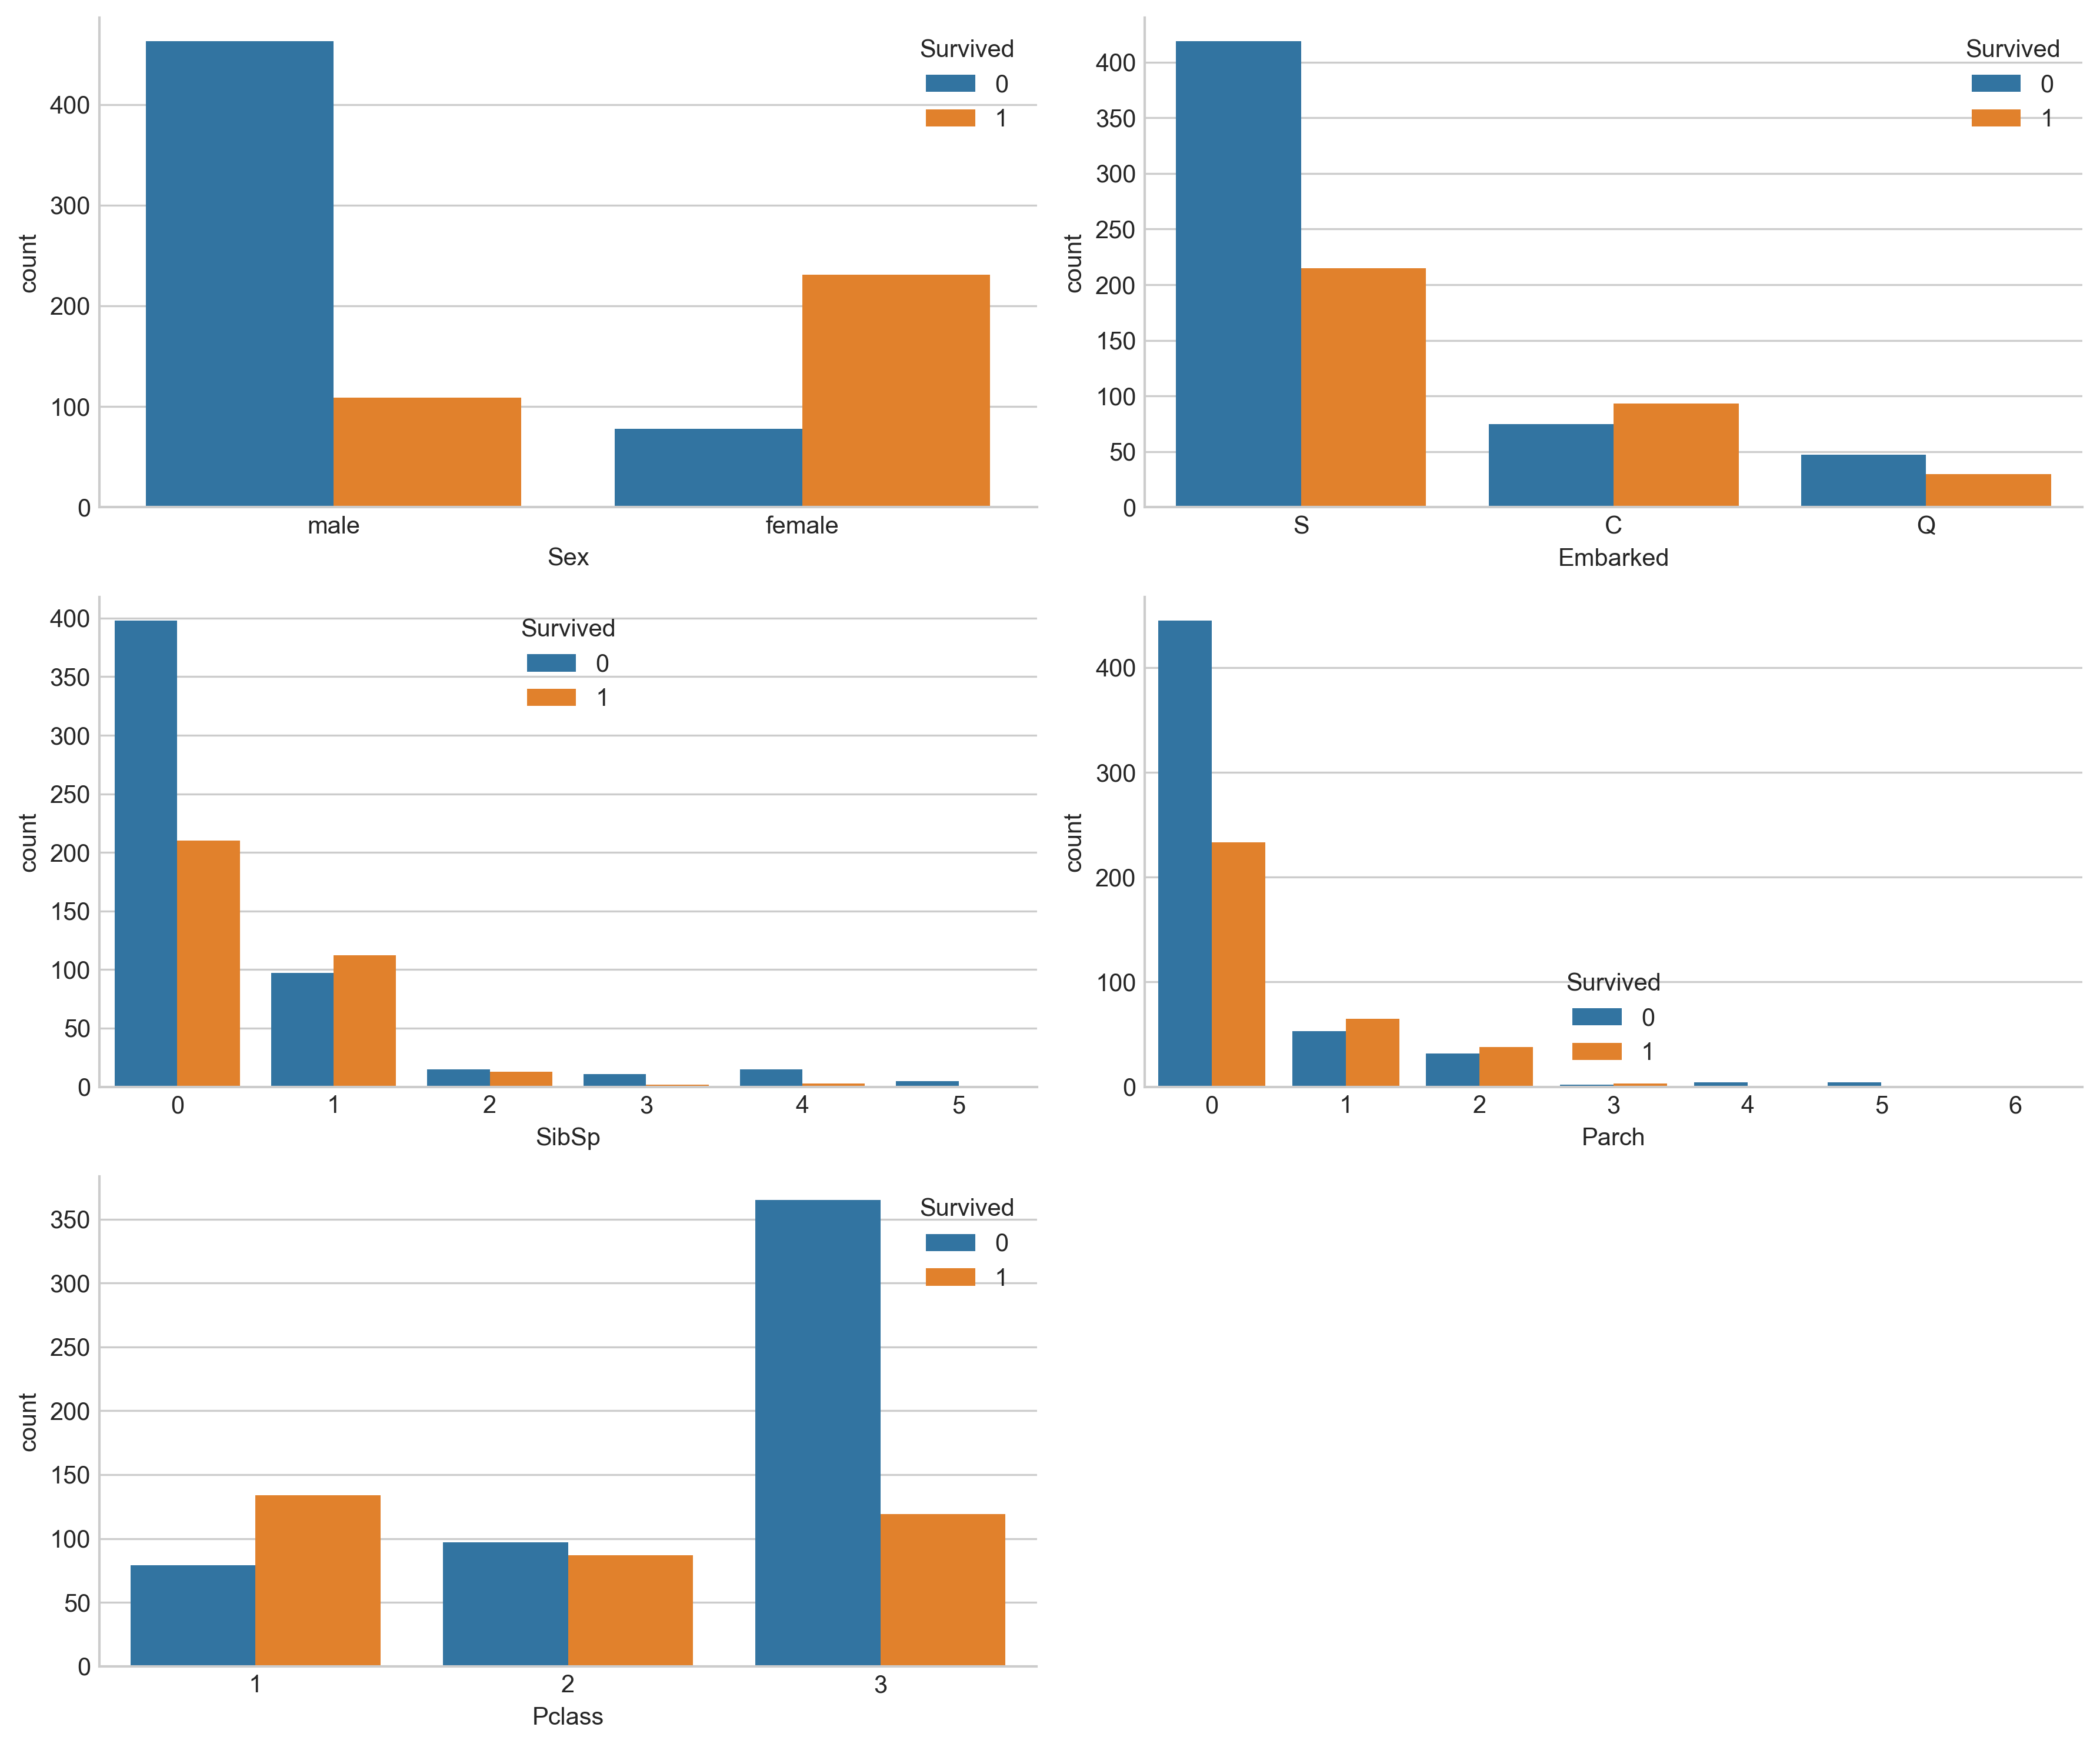

In [6]:
print(train_dataset.groupby(['Sex','Survived'])['PassengerId'].agg('count'))

categorical = ['Sex', 'Embarked','SibSp','Parch','Pclass']
def count_plots(train_dataset,categorical):
    fig = plt.figure(figsize=(12,10),dpi=300)
    size =len(categorical)
     
    for i in range(size):
        ax = fig.add_subplot(3, 2, i+1)
        sns.countplot(x=categorical[i], hue="Survived", data=train_dataset,ax=ax)
        sns.despine()
    plt.tight_layout()
    plt.show()
count_plots(train_dataset,categorical)

#### Females survived more than males
#### Most of the passengers have boared from Southamton
#### Passengers travelling alone has less chances of survival
#### Passengers in class 3 are least survived class 

#### Age Distribution of Passengers

youngest =0.42
oldest =80.0


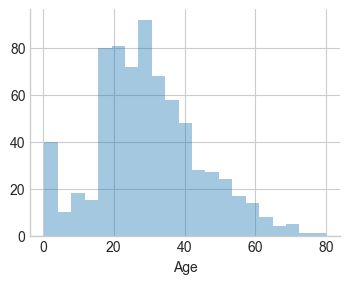

In [7]:
age=train_dataset[~train_dataset['Age'].isnull()]['Age']
youngest = train_dataset['Age'].min()
print("youngest ={0}".format(youngest))
oldest = train_dataset['Age'].max()
print("oldest ={0}".format(oldest))

fig = plt.figure(figsize=(4,3),dpi=100)
ax = fig.gca()
sns.distplot(age,kde=False,hist  =True)
sns.despine()
plt.show()

#### Age distribution by class


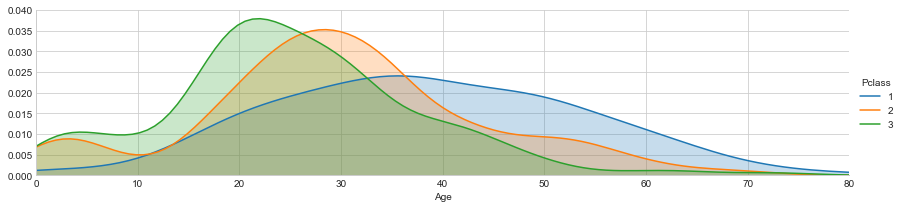

In [8]:
age_dist_by_class = sns.FacetGrid(train_dataset,hue='Pclass', aspect=4, hue_order=[1,2,3] )
age_dist_by_class.set(xlim=(0,oldest))
age_dist_by_class.set(ylim=(0,0.04))
age_dist_by_class.map(sns.kdeplot,'Age', shade=True)
age_dist_by_class.add_legend()

#### Pclass 3 - 10 to 35 , Pclass 2 - 15 to 40 years,Pclass 1 highest socioeconomically  that cover 10 to 70 years

In [9]:
def child_or_adult(passenger):
    age, sex = passenger
    if age < 21:
        return 'child'
    else:
        return sex
train_dataset['PersonStatus'] = train_dataset[['Age', 'Sex']].apply(child_or_adult, axis=1)
test_dataset['PersonStatus'] = train_dataset[['Age', 'Sex']].apply(child_or_adult, axis=1)

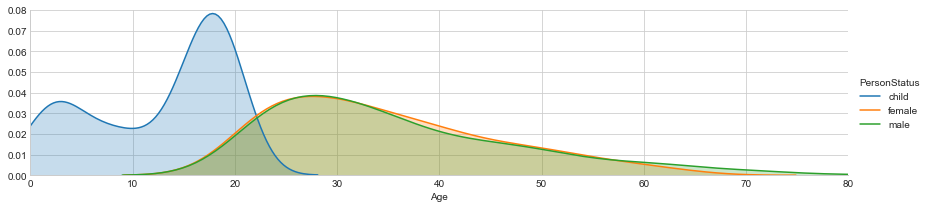

In [10]:
age_dist_by_class = sns.FacetGrid(train_dataset,hue='PersonStatus', aspect=4, hue_order=['child','female','male']  )
age_dist_by_class.set(xlim=(0,oldest))
age_dist_by_class.set(ylim=(0,0.08))
age_dist_by_class.map(sns.kdeplot,'Age', shade=True)
age_dist_by_class.add_legend()

#### Age range in children can categorized to 0-10,10-21 based on the two humps


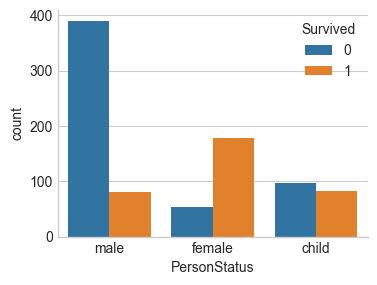

In [11]:
fig = plt.figure(figsize=(4,3),dpi=100)
ax = fig.gca()
sns.countplot(x='PersonStatus', hue="Survived", data=train_dataset,ax=ax)
sns.despine()
plt.show()

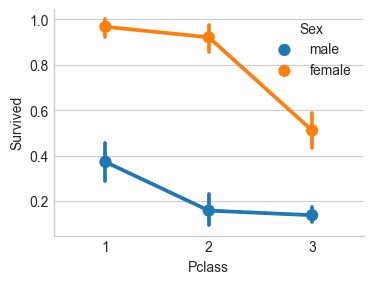

In [12]:
fig = plt.figure(figsize=(4,3),dpi=100)
ax = fig.gca()
sns.pointplot(x='Pclass', y='Survived',hue="Sex", data=train_dataset,ax=ax)
sns.despine()
plt.show()

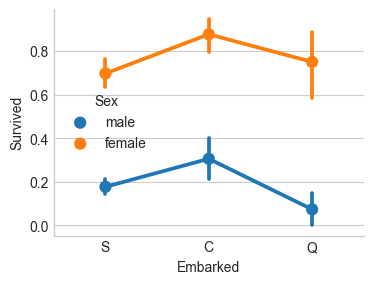

In [13]:
fig = plt.figure(figsize=(4,3),dpi=100)
ax = fig.gca()
sns.pointplot(x='Embarked', y='Survived',hue="Sex", data=train_dataset,ax=ax)
sns.despine()
plt.show()

---  
### 3. Prepare Data
#### a) Data Cleaning
#### b) Feature Selection
#### c) Data Transforms

----
##### Create new feature deck level, impute missing values with 'X'
----

In [14]:
train_dataset['Cabin'].fillna('X' ,inplace=True)
train_dataset['Deck_level'] =train_dataset['Cabin'].apply(lambda x : x[0]) 
train_dataset['Deck_level'].value_counts()

test_dataset['Cabin'].fillna('X' ,inplace=True)
test_dataset['Deck_level'] =test_dataset['Cabin'].apply(lambda x : x[0]) 

#groupby_deck =train_dataset.groupby(['deck_level','Survived'])['PassengerId'].agg({'count':'count'}) 
#sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");
 

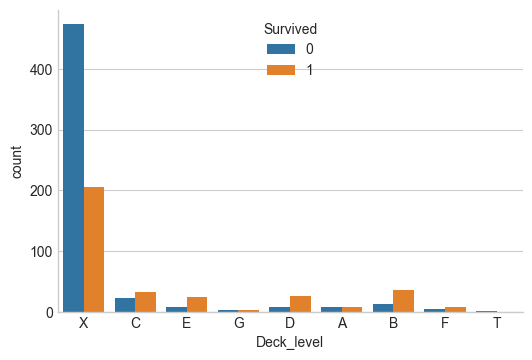

In [15]:
#g = sns.factorplot("Survived", col="deck_level" ,col_wrap=4 ,data=train_dataset,kind="count", size=3.5, aspect=.8)
#sns.factorplot(x='deck_level', y='Survived', data=train_dataset, kind='bar', aspect=1.5, size=6, 
#               order=sorted(train_dataset['deck_level'].unique()))

fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.gca()
sns.countplot(x='Deck_level', hue="Survived", data=train_dataset,ax=ax)
sns.despine()
plt.show()
 

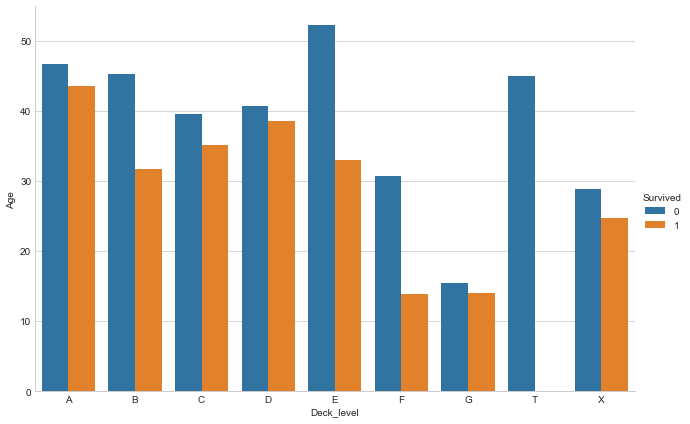

In [16]:
sns.factorplot(x='Deck_level', y='Age', hue= 'Survived' ,data=train_dataset, kind='bar', aspect=1.5, size=6,
               order=sorted(train_dataset['Deck_level'].unique()),ci=None)

----
##### Create new feature -Title,Name_length
----

In [17]:
train_dataset['Title'] =train_dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand =False)
test_dataset['Title'] = test_dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand =False)
print(train_dataset['Title'].unique())
test_dataset['Title'].unique()



['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'], dtype=object)

In [18]:

for dataset in [train_dataset,test_dataset]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Sir', 'Jonkheer', 'Dona','Don'], 'Other')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'],'Officer')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


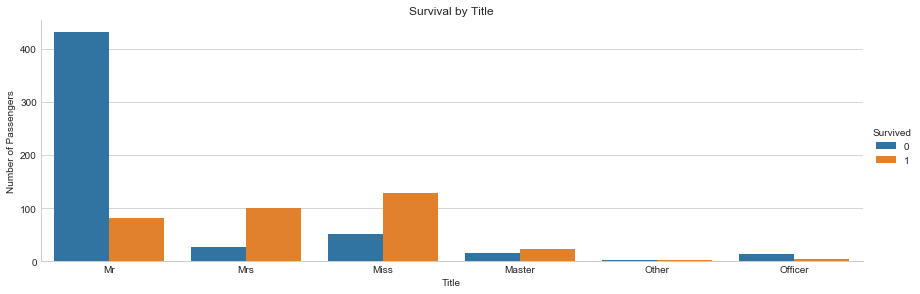

In [19]:
ax = sns.factorplot(x='Title', hue='Survived', data=train_dataset, kind='count', aspect=3, size=4)
ax.set(ylabel='Number of Passengers')
plt.title('Survival by Title')


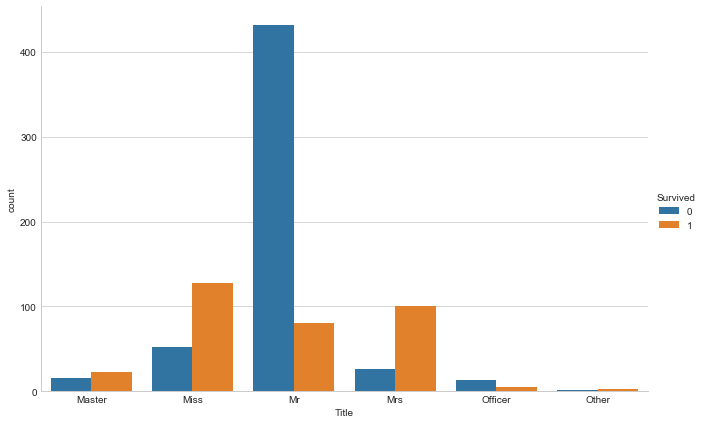

In [20]:
sns.factorplot(x='Title', hue= 'Survived' ,data=train_dataset, kind='count', aspect=1.5, size=6,
               order=sorted(train_dataset['Title'].unique()),ci=None)

----
##### Create new feature - family
----

In [21]:
def is_alone(family_size):
    if family_size > 1 :
        return "No"
    else:
        return "Yes"
train_dataset['Family_size'] = train_dataset['SibSp'] + train_dataset['Parch'] +1

train_dataset['Single'] = train_dataset['Family_size'].map(lambda s: 1 if s == 1 else 0)
train_dataset['SmallF'] = train_dataset['Family_size'].map(lambda s: 1 if  s == 2  else 0)
train_dataset['MedF']  = train_dataset['Family_size'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train_dataset['LargeF'] = train_dataset['Family_size'].map(lambda s: 1 if s >= 5 else 0)

#train_dataset['Is_alone'] =train_dataset['Family_size'].apply(is_alone )

test_dataset['Family_size'] = test_dataset['SibSp'] + test_dataset['Parch']
#test_dataset['Is_alone'] =test_dataset['Family_size'].apply(is_alone )
test_dataset['Single'] = test_dataset['Family_size'].map(lambda s: 1 if s == 1 else 0)
test_dataset['SmallF'] = test_dataset['Family_size'].map(lambda s: 1 if  s == 2  else 0)
test_dataset['MedF']  = test_dataset['Family_size'].map(lambda s: 1 if 3 <= s <= 4 else 0)
test_dataset['LargeF'] = test_dataset['Family_size'].map(lambda s: 1 if s >= 5 else 0)

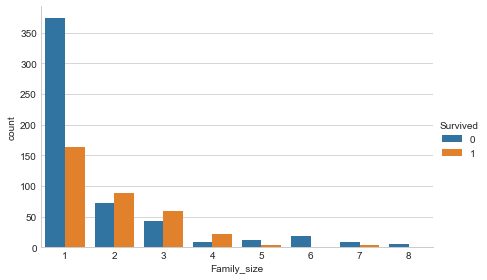

In [22]:
sns.factorplot(x='Family_size' , hue= 'Survived' ,data=train_dataset, kind='count', aspect=1.5, size=4,ci=None)

In [23]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonStatus,Deck_level,Title,Family_size,Single,SmallF,MedF,LargeF
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,male,X,Mr,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,Mrs,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,female,X,Miss,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,Mrs,2,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,male,X,Mr,1,1,0,0,0


In [24]:
train_null = train_dataset.isnull().sum()[train_dataset.isnull().sum()>0]
train_null

Age         170
Embarked      2
dtype: int64

In [25]:
test_null = test_dataset.isnull().sum()[test_dataset.isnull().sum()>0]
test_null

Age     86
Fare     1
dtype: int64

In [26]:
train_dataset['Embarked'] = train_dataset['Embarked'].fillna('S')

In [27]:
test_dataset[test_dataset['Fare'].isnull()] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonStatus,Deck_level,Title,Family_size,Single,SmallF,MedF,LargeF
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,X,S,male,X,Mr,0,0,0,0,0


In [28]:
fare_median =train_dataset[(train_dataset['Pclass'] ==3  ) & 
                  (train_dataset['Sex'] == 'male'  ) &
                  (train_dataset['Age'] >= 50  )
               ]['Fare'].median()
print(fare_median)

7.75


In [29]:
test_dataset.loc[test_dataset['Fare'].isnull(),'Fare']= fare_median


In [30]:
test_dataset.iloc[152]

PassengerId                   1044
Pclass                           3
Name            Storey, Mr. Thomas
Sex                           male
Age                           60.5
SibSp                            0
Parch                            0
Ticket                        3701
Fare                          7.75
Cabin                            X
Embarked                         S
PersonStatus                  male
Deck_level                       X
Title                           Mr
Family_size                      0
Single                           0
SmallF                           0
MedF                             0
LargeF                           0
Name: 152, dtype: object

In [31]:
full_dataset =pd.concat(objs=[train_dataset, test_dataset], axis=0).reset_index(drop=True)  
#mean_ages =full_dataset.groupby(['Parch','SibSp','Pclass','Title'])['Age'].mean()
#print(mean_ages)
median_ages =full_dataset.groupby(['Parch','SibSp','Pclass','Title'])['Age'].median()
 
median_title_ages =full_dataset.groupby(['Pclass','Title'])['Age'].median()
median_title_ages

Pclass  Title  
1       Master      6.0
        Miss       30.0
        Mr         42.0
        Mrs        45.0
        Officer    51.0
        Other      39.5
2       Master      2.0
        Miss       20.0
        Mr         30.0
        Mrs        30.5
        Officer    41.5
3       Master      6.0
        Miss       18.0
        Mr         26.0
        Mrs        31.0
Name: Age, dtype: float64

In [32]:
def fill_missing_age(row):
    #age_med = row['Age'].median()
    
    if pd.isnull(row['Age']):
        age_pred =median_ages[row['Parch'],row['SibSp'],row['Pclass'],row['Title']]
        if not np.isnan(age_pred) :
            return age_pred
        else:
            return median_title_ages[row['Pclass'],row['Title']]
        
    else:
        return row['Age']
        
    
full_dataset['Age']=full_dataset.apply(fill_missing_age,axis=1)   
full_dataset[full_dataset['Age'].isnull()]




,Age,Cabin,Deck_level,Embarked,Family_size,Fare,LargeF,MedF,Name,Parch,PassengerId,Pclass,PersonStatus,Sex,SibSp,Single,SmallF,Survived,Ticket,Title


In [33]:
Ticket = []
for each_ticket in list(full_dataset['Ticket']):
    #print(each_ticket)
    each_ticket =str(each_ticket).upper()
    if not each_ticket.isdigit() :
        each_ticket=each_ticket.replace(".","").replace("/","").strip().split(' ')[0][0:4] 
        Ticket.append(each_ticket) #Take prefix
    else:
        Ticket.append("XXX")
full_dataset["Ticket"] = Ticket


In [34]:
full_dataset['Ticket'] = full_dataset['Ticket'].astype("str")
#full_dataset['Ticket'].apply(lambda ticket: ticket.replace('.','').replace('/','') ,inplace =True) 
full_dataset.head()

,Age,Cabin,Deck_level,Embarked,Family_size,Fare,LargeF,MedF,Name,Parch,PassengerId,Pclass,PersonStatus,Sex,SibSp,Single,SmallF,Survived,Ticket,Title
0,22.0,X,X,S,2,7.2500,0,0,"Braund, Mr. Owen Harris",0,1,3,male,male,1,0,1,0.0,A5,Mr
1,38.0,C85,C,C,2,71.2833,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,female,1,0,1,1.0,PC,Mrs
2,26.0,X,X,S,1,7.9250,0,0,"Heikkinen, Miss. Laina",0,3,3,female,female,0,1,0,1.0,STON,Miss
3,35.0,C123,C,S,2,53.1000,0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,female,1,0,1,1.0,XXX,Mrs
4,35.0,X,X,S,1,8.0500,0,0,"Allen, Mr. William Henry",0,5,3,male,male,0,1,0,0.0,XXX,Mr


Male passengers name length >49 did not survive


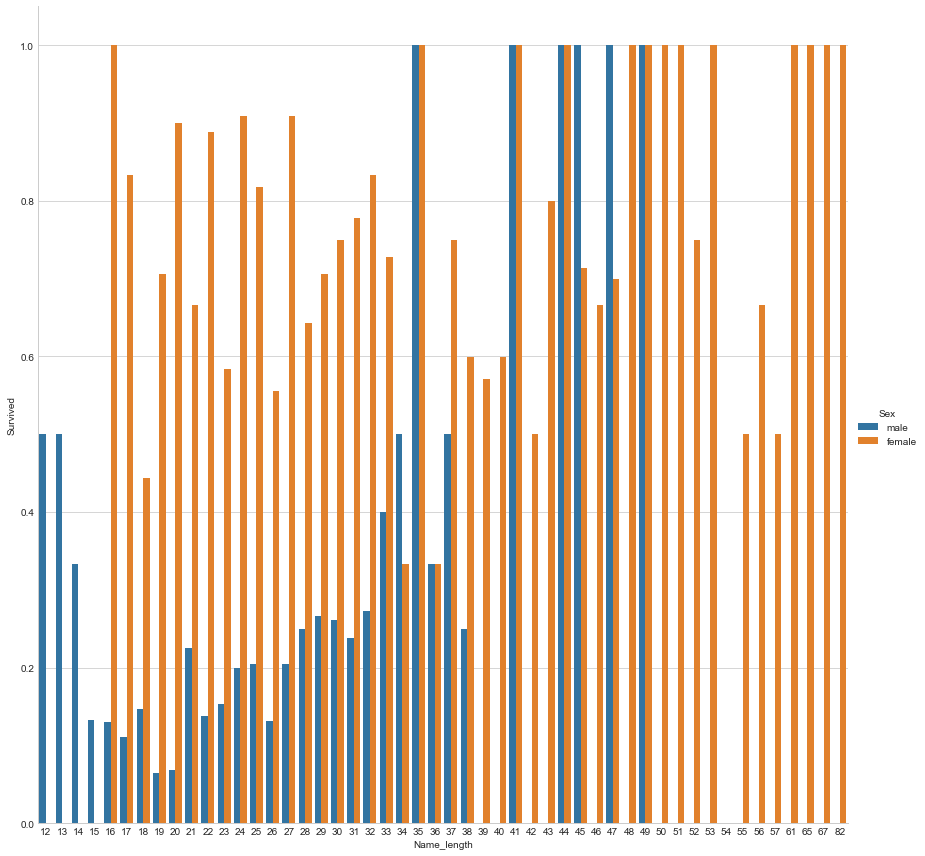

In [35]:
full_dataset['Name_length']  = full_dataset['Name'].apply(lambda x : len(x))
train_dataset['Name_length']  = train_dataset['Name'].apply(lambda x : len(x))
sns.factorplot(x="Name_length", y="Survived",hue="Sex", kind ='bar', data=train_dataset,
               ci=None,legend_out=True,size =12,aspect=1)
sns.despine()
print("Male passengers name length >49 did not survive")

In [36]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 21 columns):
Age             1299 non-null float64
Cabin           1299 non-null object
Deck_level      1299 non-null object
Embarked        1299 non-null object
Family_size     1299 non-null int64
Fare            1299 non-null float64
LargeF          1299 non-null int64
MedF            1299 non-null int64
Name            1299 non-null object
Parch           1299 non-null int64
PassengerId     1299 non-null int64
Pclass          1299 non-null int64
PersonStatus    1299 non-null object
Sex             1299 non-null object
SibSp           1299 non-null int64
Single          1299 non-null int64
SmallF          1299 non-null int64
Survived        881 non-null float64
Ticket          1299 non-null object
Title           1299 non-null object
Name_length     1299 non-null int64
dtypes: float64(3), int64(10), object(8)
memory usage: 213.2+ KB


In [37]:
full_dataset['Ticket'].unique()

array(['A5', 'PC', 'STON', 'XXX', 'PP', 'CA', 'SCPA', 'SCA4', 'A4', 'SP',
       'SOC', 'WC', 'SOTO', 'WEP', 'C', 'SOP', 'FA', 'LINE', 'FCC', 'SWPP',
       'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC', 'CASO', 'SCA3',
       'AQ4', 'A', 'LP', 'AQ3'], dtype=object)

In [38]:
#deck_level =sorted(full_dataset['Deck_level'].unique())
#deck_mapper ={key:value for value,key in enumerate(deck_level)}
#print(deck_mapper)
#full_dataset["Deck_level"].replace(deck_mapper,inplace=True)

#embarked =sorted(full_dataset['Embarked'].unique())
#embarked_mapper ={key:value for value,key in enumerate(embarked)}

#full_dataset["Embarked"].replace(embarked_mapper,inplace=True)

#is_alone =sorted(full_dataset['Is_alone'].unique())
#is_alone_mapper ={key:value for value,key in enumerate(is_alone)}

#full_dataset["Is_alone"].replace(is_alone_mapper,inplace=True)



#person_status_mapper ={key:value for value,key in enumerate(person_status)}

#full_dataset["PersonStatus"].replace(person_status_mapper,inplace=True)

#title =sorted(full_dataset['Title'].unique())
#title_mapper ={key:value for value,key in enumerate(title)}

#full_dataset["Title"].replace(title_mapper,inplace=True)

In [39]:
#quantile_list = [0, .20, .40,.60 ,.80, 1.]
#quantile_labels = ['Age[0-20Q]', 'Age[20-40Q]', 'Age[40-60Q]', 'Age[60-80Q]','Age[80-100Q]']
#full_dataset['Age_QR'] = pd.qcut(full_dataset['Age'],q=quantile_list)
#full_dataset['Age_QL'] = pd.qcut(full_dataset['Age'],q=quantile_list,labels=quantile_labels)

In [40]:
'''
Fare_list = [0, .25, .5, .75, 1.]
Fare_labels = ['Fare[0-25Q]', 'Fare[25-50Q]', 'Fare[50-75Q]', 'Fare[75-100Q]']
full_dataset['Fare_QR'] = pd.qcut(full_dataset['Fare'],q=Fare_list)
full_dataset['Fare_QL'] = pd.qcut(full_dataset['Fare'],q=Fare_list,labels=Fare_labels)

def fill_Fare(row):
    if (row['Fare']==0):
        return 'Fare[unassigned]'
    else:
        return row['Fare_QL']
        
    
full_dataset['Fare_QL']=full_dataset.apply(fill_Fare,axis=1)    

full_dataset[full_dataset['Fare']==0]
'''

"\nFare_list = [0, .25, .5, .75, 1.]\nFare_labels = ['Fare[0-25Q]', 'Fare[25-50Q]', 'Fare[50-75Q]', 'Fare[75-100Q]']\nfull_dataset['Fare_QR'] = pd.qcut(full_dataset['Fare'],q=Fare_list)\nfull_dataset['Fare_QL'] = pd.qcut(full_dataset['Fare'],q=Fare_list,labels=Fare_labels)\n\ndef fill_Fare(row):\n    if (row['Fare']==0):\n        return 'Fare[unassigned]'\n    else:\n        return row['Fare_QL']\n        \n    \nfull_dataset['Fare_QL']=full_dataset.apply(fill_Fare,axis=1)    \n\nfull_dataset[full_dataset['Fare']==0]\n"

In [41]:
#age_ql =sorted(full_dataset['Age_QL'].unique())
#age_ql_mapper ={key:value for value,key in enumerate(age_ql)}

#full_dataset["Age_QL"].replace(age_ql_mapper,inplace=True)


In [42]:
def child_or_adult(passenger):
    age, sex = passenger
    if age < 5:
        return 'infant'
    elif age >=5 and age < 10:
        return 'child'
    
    elif (age >= 10 and age < 20) and (sex =='male') :
        return 'young_male'
    elif (age >= 10 and age < 20) and (sex =='female') :
        return 'young_female'
    elif (age >= 20 and age < 50) and (sex =='male') :
        return 'adult_male'
    elif (age >= 20 and age < 50) and (sex =='female') :
        return 'adult_female'
    elif (age >= 50 ) and (sex =='male') :
        return 'old_male'
    elif (age >= 50 ) and (sex =='female') :
        return 'old_female'
    
full_dataset['PersonStatus'] = full_dataset[['Age', 'Sex']].apply(child_or_adult, axis=1)
full_dataset['PersonStatus'] = full_dataset[['Age', 'Sex']].apply(child_or_adult, axis=1)

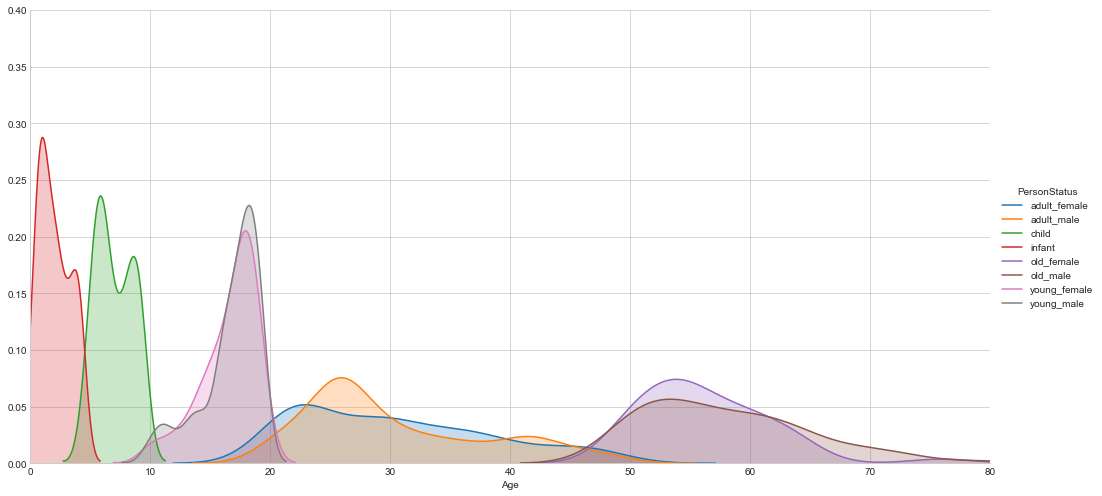

In [43]:
person_status_sorted =sorted(full_dataset['PersonStatus'].unique())
age_dist_by_class = sns.FacetGrid(full_dataset,hue='PersonStatus',  size=7,aspect=2, hue_order=person_status_sorted  )
age_dist_by_class.set(xlim=(0,oldest))
age_dist_by_class.set(ylim=(0,0.4))
age_dist_by_class.map(sns.kdeplot,'Age', shade=True)
age_dist_by_class.add_legend()

In [44]:
 
def get_familyname(name):
    return name.split(',')[0]
    
#full_dataset['Family_name'] =train_dataset['Name'].apply(get_familyname) 

import operator
family_id_mapping = {}
def get_family_id(row):
    last_name = row["Name"].split(",")[0]
    family_id = "{0}{1}".format(last_name, row["Family_size"])
    
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

family_ids = full_dataset.apply(get_family_id, axis=1)
# There are a lot of family ids, so we'll compress all of the families under 3 members into one code.
family_ids[full_dataset["Family_size"] < 3] = -1
full_dataset["Family_id"] = family_ids
full_dataset.head()

,Age,Cabin,Deck_level,Embarked,Family_size,Fare,LargeF,MedF,Name,Parch,...,PersonStatus,Sex,SibSp,Single,SmallF,Survived,Ticket,Title,Name_length,Family_id
0,22.0,X,X,S,2,7.2500,0,0,"Braund, Mr. Owen Harris",0,...,adult_male,male,1,0,1,0.0,A5,Mr,23,-1
1,38.0,C85,C,C,2,71.2833,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,...,adult_female,female,1,0,1,1.0,PC,Mrs,51,-1
2,26.0,X,X,S,1,7.9250,0,0,"Heikkinen, Miss. Laina",0,...,adult_female,female,0,1,0,1.0,STON,Miss,22,-1
3,35.0,C123,C,S,2,53.1000,0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,...,adult_female,female,1,0,1,1.0,XXX,Mrs,44,-1
4,35.0,X,X,S,1,8.0500,0,0,"Allen, Mr. William Henry",0,...,adult_male,male,0,1,0,0.0,XXX,Mr,24,-1


In [45]:
person_status_sorted =sorted(full_dataset['PersonStatus'].unique())
print(person_status_sorted)


['adult_female', 'adult_male', 'child', 'infant', 'old_female', 'old_male', 'young_female', 'young_male']


In [46]:
'''
fare_ql =sorted(full_dataset['Fare_QL'].unique())

fare_ql_mapper ={key:value for value,key in enumerate(fare_ql)}
full_dataset["Fare_QL"].replace(fare_ql_mapper,inplace=True)
fare_ql
'''

'\nfare_ql =sorted(full_dataset[\'Fare_QL\'].unique())\n\nfare_ql_mapper ={key:value for value,key in enumerate(fare_ql)}\nfull_dataset["Fare_QL"].replace(fare_ql_mapper,inplace=True)\nfare_ql\n'

In [47]:
#full_dataset = pd.get_dummies(full_dataset, columns = ["Pclass"],prefix="Pc")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Deck_level"],prefix="Deck_level=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Embarked"],prefix="Embarked=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["PersonStatus"],prefix="PersonStatus=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Family_size"],prefix="Family_size=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Single"],prefix="Single=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["SmallF"],prefix="SmallF=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["MedF"],prefix="MedF=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["LargeF"],prefix="LargeF=")

#full_dataset = pd.get_dummies(full_dataset, columns = ["Title"],prefix="Title=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Age_QL"],prefix="Age_QL=")
#full_dataset = pd.get_dummies(full_dataset, columns = ["Fare_QL"],prefix="Fare_QL=")

#full_dataset.head()

In [48]:
#full_dataset = pd.get_dummies(full_dataset, columns = ["Ticket"], prefix="T") 
from sklearn import feature_extraction
def one_hot_dataframe(data,columns,replace=False):
    fe_vec= feature_extraction.DictVectorizer()
    make_dict = lambda row :dict((column,row[column]) for column in  columns)
    vector_data=pd.DataFrame(fe_vec.fit_transform( data[columns].apply(make_dict, axis=1)).toarray())
    vector_data.columns = fe_vec.get_feature_names()
    vector_data.index= data.index
    if replace:
        data = data.drop(columns, axis=1)
        data = data.join(vector_data)
    return data,vector_data



In [49]:
full_dataset,full_dataset_ignore = one_hot_dataframe(full_dataset, ['PersonStatus','Pclass','Embarked','Title','Deck_level'], replace=True)
 
full_dataset.head()

,Age,Cabin,Family_size,Fare,LargeF,MedF,Name,Parch,PassengerId,Sex,...,PersonStatus=old_female,PersonStatus=old_male,PersonStatus=young_female,PersonStatus=young_male,Title=Master,Title=Miss,Title=Mr,Title=Mrs,Title=Officer,Title=Other
0,22.0,X,2,7.2500,0,0,"Braund, Mr. Owen Harris",0,1,male,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,C85,2,71.2833,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,X,1,7.9250,0,0,"Heikkinen, Miss. Laina",0,3,female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,35.0,C123,2,53.1000,0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,X,1,8.0500,0,0,"Allen, Mr. William Henry",0,5,male,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
features_drop = ['SibSp','Parch','Cabin','Name','Sex','PassengerId','Family_size','Ticket','Name_length']
full_dataset = full_dataset.drop(features_drop, axis=1)


In [51]:
 
print(full_dataset.info())
full_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 35 columns):
Age                          1299 non-null float64
Fare                         1299 non-null float64
LargeF                       1299 non-null int64
MedF                         1299 non-null int64
Single                       1299 non-null int64
SmallF                       1299 non-null int64
Survived                     881 non-null float64
Family_id                    1299 non-null int64
Deck_level=A                 1299 non-null float64
Deck_level=B                 1299 non-null float64
Deck_level=C                 1299 non-null float64
Deck_level=D                 1299 non-null float64
Deck_level=E                 1299 non-null float64
Deck_level=F                 1299 non-null float64
Deck_level=G                 1299 non-null float64
Deck_level=T                 1299 non-null float64
Deck_level=X                 1299 non-null float64
Embarked=C                   1299 non

,Age,Fare,LargeF,MedF,Single,SmallF,Survived,Family_id,Deck_level=A,Deck_level=B,...,PersonStatus=old_female,PersonStatus=old_male,PersonStatus=young_female,PersonStatus=young_male,Title=Master,Title=Miss,Title=Mr,Title=Mrs,Title=Officer,Title=Other
0,22.0,7.2500,0,0,0,1,0.0,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,71.2833,0,0,0,1,1.0,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,7.9250,0,0,1,0,1.0,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,35.0,53.1000,0,0,0,1,1.0,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,35.0,8.0500,0,0,1,0,0.0,-1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
train_dataset =full_dataset[~full_dataset['Survived'].isnull()]
test_dataset =full_dataset[full_dataset['Survived'].isnull()]
#train_dataset["Survived"] = train_dataset["Survived"].astype("int")
train_dataset.drop(labels=["Survived"],axis = 1,inplace=True)
test_dataset.drop(labels=["Survived"],axis = 1,inplace=True)
train_dataset_null = train_dataset.isnull().sum()[train_dataset.isnull().sum()>0]

F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### 4. Evaluate Algorithms - Logistic regression
####  a) Split-out validation dataset
####  b) Test options and evaluation metric


In [53]:
train_dataset.head()
z
 

NameError: name 'z' is not defined

In [54]:
from sklearn import metrics
from sklearn.metrics import roc_curve
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

In [55]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [105]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")

In [56]:
def plot_roc(X_val,y_val,model):
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.title("roc_curve");
    # find threshold closest to zero:
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

In [57]:
kfold = StratifiedKFold(n_splits=10)
from sklearn.model_selection  import  train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
test_size = 0.33
seed = 7

X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(train_dataset, train_y, test_size=test_size,random_state=seed)
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
X_trainmodel_std =scaler.fit_transform(X_trainmodel)
X_val_std =scaler.transform(X_val)
X_test_std=scaler.transform(test_dataset)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='perceptron', n_iter=5, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
Accuracy: 83.220
Classification report
             precision    recall  f1-score   support

          0       0.80      0.85      0.83       170
          1       0.77      0.71      0.74       121

avg / total       0.79      0.79      0.79       291

Confusion matrix
[[144  26]
 [ 35  86]]


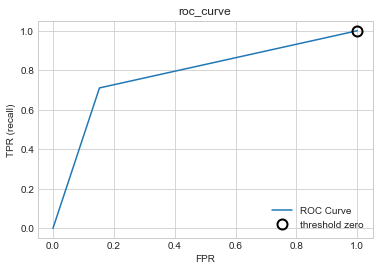

In [64]:

from sklearn.linear_model  import SGDClassifier
 
#sgdmodel = SGDClassifier(loss="hinge",penalty="l2",alpha=0.1 ,n_iter=100 ,shuffle=False)
#loss ="perceptron" ,penalty="elasticnet",alpha=0.0001, n_iter=1000,power_t=1,epsilon=0.1
sgdmodel = SGDClassifier(loss="perceptron",penalty="elasticnet")
sgdmodel.fit(X_trainmodel_std, y_trainmodel.values.ravel())
print(sgdmodel)
result = sgdmodel.score(X_trainmodel_std, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val_std,y_val,sgdmodel, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

#y_pred_result=logrmodel.predict(test_dataset)
fpr, tpr, thresholds = roc_curve(y_val, sgdmodel.predict(X_val_std))
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("roc_curve");
    # find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy: 97.627
Classification report
             precision    recall  f1-score   support

          0       0.80      0.88      0.84       170
          1       0.81      0.69      0.74       121

avg / total       0.80      0.80      0.80       291

Confusion matrix
[[150  20]
 [ 38  83]]


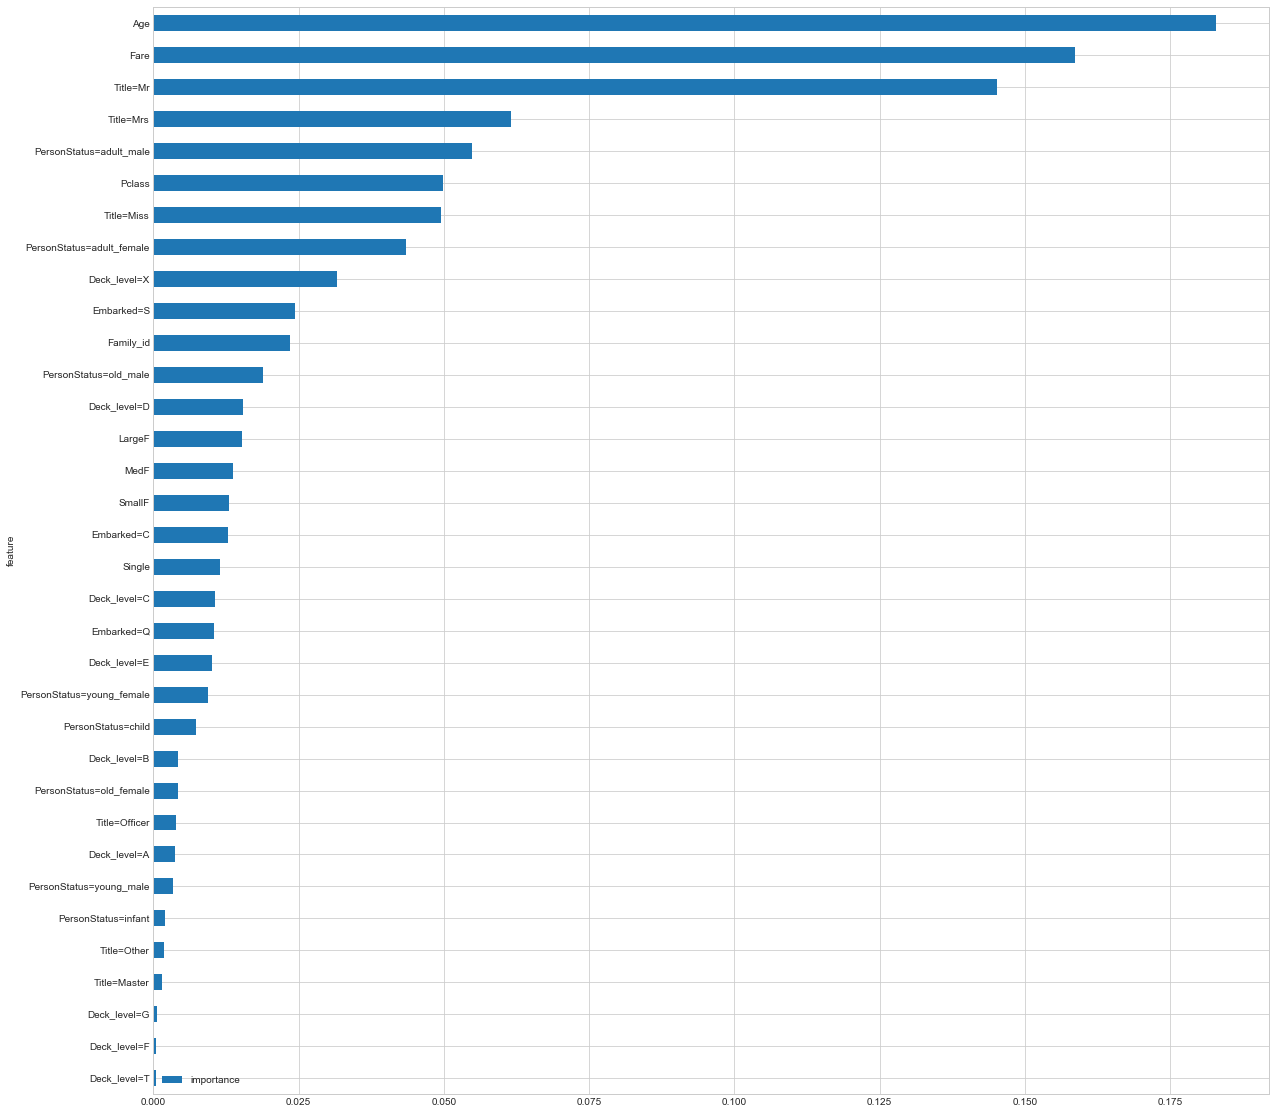

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier()

print(rfc)
rfc.fit(X_trainmodel, y_trainmodel.values.ravel())
result = rfc.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val,y_val,rfc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

features = pd.DataFrame()
features['feature'] = X_trainmodel.columns
features['importance'] = rfc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))
#y_pred_result=rfc.predict(test_dataset)


In [76]:
feature_labels =X_trainmodel.columns.values

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfc, threshold=0.005)

# Train the selector
sfm.fit(X_trainmodel,y_trainmodel.values.ravel())
important_features =[feature_labels[feature_list_index] for feature_list_index in sfm.get_support(indices=True)]
print(important_features)
print(len(important_features))
X_trainmodel_fe = sfm.transform(X_trainmodel)
X_val_fe = sfm.transform(X_val)
X_test_fe =sfm.transform(test_dataset)

['Age', 'Fare', 'LargeF', 'MedF', 'Single', 'SmallF', 'Family_id', 'Deck_level=C', 'Deck_level=D', 'Deck_level=X', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Pclass', 'PersonStatus=adult_female', 'PersonStatus=adult_male', 'PersonStatus=infant', 'PersonStatus=old_male', 'PersonStatus=young_female', 'PersonStatus=young_male', 'Title=Miss', 'Title=Mr', 'Title=Mrs', 'Title=Officer']
24


In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
## Search grid for optimal parameters
from scipy.stats import randint as sp_randint

parameter_grid = {
                 'max_depth' : [6],
                  
                 'max_features': ['sqrt'],
                 "min_samples_split": [15],
                 "min_samples_leaf": [2,3,5],
                 
                 'bootstrap': [False],
                  "criterion": ["gini"],
                  #"class_weight":[{0: 0.61616, 1: 0.38384}]
                 }

rfcg =RandomForestClassifier(n_estimators= 500)
grid_search = GridSearchCV(rfc,param_grid = parameter_grid,verbose = 1,n_jobs =-1,cv=kfold)

grid_search.fit(X_trainmodel ,y_trainmodel.values.ravel())

rfc_best = grid_search.best_estimator_

 

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   49.8s finished


Best parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 15, 'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 2}
Best cross-validation score: 0.85
Best estimator:
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Classification report
             precision    recall  f1-score   support

          0       0.79      0.86      0.82       170
          1       0.78      0.67      0.72       121

avg / total       0.78      0.78      0.78       291

Confusion matrix
[[147  23]
 [ 40  81]]


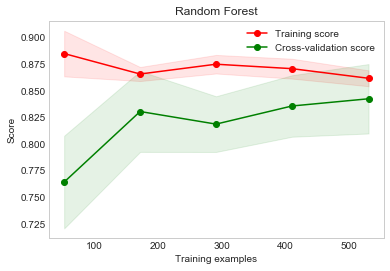

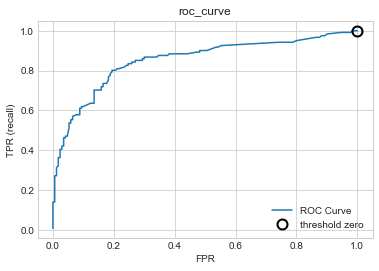

In [101]:
#Best score
'''
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

'''
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

clf_important = rfc_best

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_trainmodel, y_trainmodel.values.ravel())
g = plot_learning_curve(clf_important,"Random Forest",X_trainmodel,y_trainmodel.values.ravel(),cv=kfold)
plot_roc(X_val,y_val,clf_important)

y_pred=measure_performance(X_val,y_val,clf_important, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)


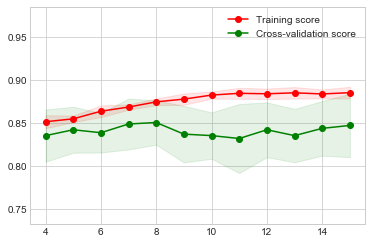

In [110]:
 
training_scores, validation_scores = validation_curve(rfc_best, X_trainmodel,y_trainmodel.values.ravel(),
                                                      param_name="max_depth", param_range=range(4, 16), cv=kfold)

plot_validation_curve(range(4, 16), training_scores, validation_scores)

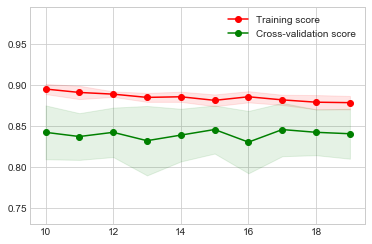

In [113]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXQAAAD0CAYAAACLpN0/AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl8VOXd///XOWe2zGRnS4AmYZdalUZbtQWXWlRqb1uqlsViXaq/9qtgiyhQ1KIVTHu3tC53tdq6ISK3Squo0Iq9LYWK2pRg0YgiskNYEpJMZjIzZ875/XEyJzPZV5IZPs8H85jMcibXYTLvc821HcU0TRMhhBBJT+3rAgghhOgZEuhCCJEiJNCFECJFSKALIUSKkEAXQogUIYEuhBApwtFXv7i0tLSvfrUQQiS1M888s8X7+yzQofVCdUR5eTnjx4/vwdL0H7JvySuV90/2rX9oqzIsTS5CCJEiJNCFECJFSKALIUSKkEAXQogUIYEuhBApQgJdCCFShAS6EEKkCAl0IZLJihVQVASqal2vWNGtlyspKWHWrFlceumlXHDBBcyaNYs5c+Z0aNvy8nIefvjhVh/fsGEDq1at6lb5ROf06cQiIUQnrFgBN90EgYB1e/du6zbA1Vd36SUXLFgAwOrVq9m5cyfz5s3r8Lbjx49vczLOeeed16Uyia6TQBeiv3jmGXjiidYf37wZQqHE+wIBuOEGePzxlre5/nq45ppOF+Wdd97hV7/6FU6nk+9+97t4PB4ef/xxXC4XiqLw8MMP88knn/D888/zm9/8hosvvpji4mI+++wzBgwYwEMPPcTLL7/Mzp07mT59Orfddht5eXns3buX0047jXvuuYfKykrmzZtHOBxmxIgRbN68mTfeeMMuQygU4tZbb8Xv9xMMBvnJT37CxIkTeeGFF1i5ciWGYfC1r32NOXPm8Morr/D000/jcrkoKiri3nvvZc2aNbz00ksYhsGcOXM4fvw4Tz31FKqqcuaZZ3bq4JUspMlFiGTRNMzbu7/bvy7Ec889x7e//W127drFXXfdxcqVKxk9ejQbN25MeO7evXu59dZbWbVqFZWVlfznP/9JeHzXrl0sWbKEF154gQ0bNnDkyBEeffRRLrroIp599lkuvfRSotFowjZ79uzh+PHjPProoyxbtoxoNMqxY8d4/PHHee655/jTn/5EOBxm//79PPTQQzz99NOsXLmSjIwMu6knMzOTlStXMn78eB566CGeeuopVq5cSUVFBZs2beqV/7e+JDV0IfqLa65puzZdVGQ1szRVWAhvvdXjxRkxYoT984ABA3jggQfIy8tj586dTJgwIeG5OTk55OfnA5Cfn0+oyUGmoKCA9PR0AAYNGkQoFOLTTz9l6tSpAJx11lnNfv+YMWOYNm0ac+fORdd1Zs2axd69exkzZgwejweAefPm8f777zN69Gj79b/0pS+xceNGzjjjDHsf9uzZQ2VlJTc1NFHV1dWxZ88evvrVr3b7/6k/kRq6EMliyRLwehPv83qt+3uBqlrxUFtby4MPPshtt93Gfffdh9vtpum55RVFafO1Wnp87NixbNmyBYCysrJmj2/fvp26ujoee+wxSkpK+PnPf05BQQE7d+4kHA4DMGfOHAYMGMCnn35KoKFv4d1337WDPLYPw4cPJz8/nyeeeILly5fzve99r9lBKRVIDV2IZBHr+Fy0CPbsgYICK8y72CHaUenp6RQXF7NgwQLS09PJzMzk8OHDDB8+vFuve+ONN3LHHXewdu1aBg8ejMORGEdFRUX8z//8D2vXrrXbwXNzc7nxxhv53ve+h6IoXHjhhQwbNozZs2dzzTXXoKoqBQUFzJs3j9dee81+rdzcXK699lpmzZpFNBpl2LBhTJkypVvl748Us+mh9gQpLS2V5XNbIfuWvFJ5/3p63/7+97+Tk5PD6aefzj//+U8effRRnnnmmR57/c5IpvetreyUGroQok8MHz6cn/70p2iahmEYLFq0qK+LlPQk0IUQfWLUqFEy8aiHSaeoEEKkCAl0IYRIERLoQgiRIiTQhRAiRUigC5FEVvxnBUW/LUK9R6Xot0Ws+E/3VlsE+OSTT7jpppuYNWsWV1xxBQ8++GCziUN9KTabc8mSJRw4cCDhsU8//ZRZs2a1uf2zzz4LnByrP8ooFyGSxIr/rOCmNTcRiFgzIndX7+amNdZU9qtP69rkopqaGubOnctDDz1EUVER0WiUW2+9leeff54ZM2b0WNl7QleHNT7yyCN873vfOylWf5RAF6KfeGbrMzyxpfXVFjfv20womrhGSiAS4IaXb+Dx0pZXW7z+i9dzzRmtrw/z5ptvcvbZZ1NUVASApmn84he/wOl0NltxMRgMcvfdd+N2u8nOzmbp0qXous6Pf/xjTNMkFApxzz33MHLkyBZXSYyJRCJ84xvf4OWXX8br9fLHP/4RTdP4yle+QklJCdFolKqqKhYvXkxxcbG93axZs1i8eDEZGRnMmzcP0zQZNGiQ/fi6detYsWIFuq7bK0KuWrWK6upqFi9ezOmnn24vEfzEE0/w2muv4XA4OOuss/jmN7/JQw89xL59+zh27BgHDhxg4cKFTJo0yX79ZFj9UZpchEgSTcO8vfs74vDhw3zuc59LuM/n8+FyuazXblhx8Vvf+ha/+93vePjhh3n22Wf50pe+xCOPPML7779PdnY2jz/+OHfffTeBQKDFVRLjOZ1OLr74Yv76178C8Oqrr/Ktb32LHTt2MH/+fJ5++mluvPFGVq9e3WKZH330Ub75zW+yfPlyvv71r9v379q1i8ceeyxhRcgf/ehHZGVlsXjxYvt527dvZ+3atTz//PM8//zz7N69m/feew8Al8vFH/7wBxYtWsRTTz2V8HuTYfXHdmvohmGwePFitm/fjsvl4r777qOwsNB+/M9//jN//OMfycjIYOrUqVx11VUATJ061V79bPjw4dx///3dLqwQqeyaM65pszZd9Nsidlc3X22xMKuQt659q0u/c+jQoXz44YcJ9+3du5dDhw4BjSsuVlVV4fV6GTJkCGCtaLhs2TJuv/12du3axf/7f/8Ph8PBj370oxZXSfzXv/7FAw88AMANN9zAVVddxeLFixk5ciQjRowgJyeHwYMH87vf/Q6Px0NdXZ2dH03t2rWL7373uwAUFxezcuVKwFoRcv78+fh8vhZXhIzZuXMnZ5xxBk6nE7BWety7dy+ZmZn29P+8vDx7AbCYZFj9sd1AX79+PeFwmFWrVlFWVkZJSQmPPPIIAJWVlTz44IOsXr2azMxMrr32Ws4991wGDRqEaZosX768W4UTQjRactGShDZ0AK/Ty5KLur7a4oUXXsjvf/97ZsyYQUFBAZFIhJKSEr7yla8wevRoe7XCnJwcAoEAhw8fZvDgwbz77rsUFRXxzjvvMHjwYJ544gm2bNnCsmXLuPPOO+1VEg8fPsz06dP529/+1iwPTNPkD3/4g91Wv2TJEn71q18xatQoHnzwQfbv399imUeNGsWWLVs45ZRT7HXXYytCvtWwjPB1111nd+w27eAdOXIkTz75JLquo2ka7733HmeddRZ+v7/NVSPjV3+M7deLL75or/7ocrmYM2cO8+fPt1d/9Hq97a7+6HQ6Wb16dY+sJdNuoJeWltrtSBMmTGDbtm32Y/v27WPcuHFkZ2cDcNppp7F161aGDx9OMBjk+uuvR9d15s6dm5JLVQpxIsU6Phe9uYg91XsoyCpgyUVLutwhCtZKiiUlJdx5552YpkldXR0XXnghM2fO5N1337WfpygKN998M7Nnz0ZRFLKysrj//vtRFIW5c+eycuVKdF3n5ptvbnGVxJZceeWVPPjgg5xzzjkAXH755dx6661kZmaSl5dHVVVVi9v96Ec/4vbbb+f111+3V3yMrQg5bdo0HA6HvSIkWAeAefPm8ZWvfAWAcePGMWXKFGbMmIFhGJx55pmcffbZvPnmm23+XyXD6o/trra4aNEiLr74Ys4//3wALrjgAtavX4/D4aC6uporr7ySlStX4vP5uPrqq5kxYwann346W7du5aqrrmLXrl3ceOONrFu3LmF5zNLSUrxN13buhPr6evtrTqqRfUteqbx/sm/9QyAQ6Ppqi+np6dTV1dm3DcOwgzkrK4uFCxcye/ZssrOzOfXUU8nJyWHEiBEUFhaiKAojRowgOzubI0eO2Gc0ienOV4xkWu6ys2Tfklcq75/sW/9QWlra6mPtjnIpLi5mw4YNgHVWkbFjx9qP6brOhx9+yHPPPccDDzzAzp07KS4u5sUXX6SkpASAiooK/H5/wvAiIYQQPa/dGvrkyZPZtGkT06dPxzRNli5dypo1awgEAkybNg2wRrS43W6uu+46cnNzufLKK1m4cCEzZsxAURSWLl3a7GwkQgghela7KauqKvfee2/CfaNGjbJ/vuWWW7jlllsSHne5XPz617/uoSIKIYToCJlYJIQQKUICXQghUoQEuhBCpAgJdCGESBES6EIIkSIk0IUQIkVIoAshRIqQQBdCiBQhgS6EEClCAl0IIVKEBLoQQqQICXQhhEgREuhCCJEiJNCFECJFSKALIUSKkEAXQogUIYEuhBApQgJdCCFShAS6EEKkCAl0IYRIERLoQgiRIiTQhRAiRUigCyFEipBAF0KIFCGBLoQQKUICXQghUoQEuhBCpAgJdCGESBES6EIIkSIk0IUQIkVIoAshRIqQQBdCiBQhgS6EEClCAl0IIVKEBLoQQqSIdgPdMAzuvvtupk2bxqxZs9i9e3fC43/+85/5r//6L2bOnMkLL7zQoW2EEEL0vHYDff369YTDYVatWsVtt91GSUmJ/VhlZSUPPvggy5cv59lnn2XNmjXs27evzW2EEEL0Dkd7TygtLWXSpEkATJgwgW3bttmP7du3j3HjxpGdnQ3AaaedxtatW3n//fdb3UYIIUTvaDfQ/X4/6enp9m1N09B1HYfDQWFhITt27ODo0aP4fD7efvttioqK2twmXnl5eZcLXl9f363t+zPZt+SVyvsn+9b/tRvo6enp1NXV2bcNw7CDOSsri4ULFzJ79myys7M59dRTycnJaXObeOPHj+9ywcvLy7u1fX8m+5a8Unn/ZN/6h9LS0lYfa7cNvbi4mA0bNgBQVlbG2LFj7cd0XefDDz/kueee44EHHmDnzp0UFxe3uY0QQoje0W4NffLkyWzatInp06djmiZLly5lzZo1BAIBpk2bBsDUqVNxu91cd9115ObmtriNEEKI3tVuoKuqyr333ptw36hRo+yfb7nlFm655ZZ2txFCCNG7ZGKREEKkiHZr6EIIIXqIaYJhWD9rWo+/vAS6EMkoFgymCYpi3acoiT/3pVjZ4svZ9D7DgGjUuhgG6HrjfbHQczjA6bSuYz+rauNF06zr/rC/8WWP7VckYl3CYeu2rlv7n5YGBQU9XgwJdCH6q1jIxYIgHLYu9fWNwdCSWMirDS2q8YEXC8Iu/KzU1UF1dWN4xQI4dh0faPEHmqbliokdgGKXWDlV1QpvsF6vvr7x9eP3Of71YtvEh7/L1XL4q51oaW560Im9F7GgjkQa97/pvsb/blW1yuPxWM8Nhztehk6QQBeir5hmY0BEo42BHQpZ101DIhZIsbBqr1Yaqw03/TkWjNFo8+e0sa3zyBHIzGwM3qZh3NFydUZHwze2P5GI9f8Xux3/eHy5moS/Wl0Nx441HjhjQd1amRSl8f1IS+v7bwgNJNCF6E3xga3rjWEdCjUPjFhIaFrbIbF6NZSUwIEDMHQoLFgA3/lO8+fFN8H0AMPrhbgZ4L2mo/sXT1Eaa/XtiW/yaaj9a1VVcPx443vgdILb3fNBHb9vBQWwZAlcfXWPvbwEuhCdFf/1P/Zzw0U9fhwOHmysbcdqurFgiAW202l9/e6s1avhjjsgGLRu799v3Yb2Q6+rGkJodGcCtju/q7f3L/7A2bBvo/pi33bvhptusn7uoVCXQBcnrxYCuVlnna43XuI7tSCx9rZmDSxbxtiDByE/H+bPhyuu6H4NLxyGmhqr7bq6Gu65pzEQYoJBuOsuq5kg1n7c1YvT2XjA0TR49VVrX4JBFLAC9vbbrTJ97WtWDbfpJRhs+f72LqEQ7NiR2FQS27+5c2HVKuubi9ebeB27NL2/tWuPx3pf4gLW3rfYwePb34ZAAOrqrEsgkHg7dl9rt1t6rKam+fsbCMCiRRLoQrTKNBM7ruJDORbMseBuTdNOulinVktfw1evtgI1FgwHDlg1PVWFqVPB77c+zMePJ4ZzdXX7t5uGd2uOH7dC70Sor7dCqDMUxQrS1i4DB1rX27e3vH0kYv3eykrr/yR2CQSsxzorLc06gDT9GwgGYc4cmD2746+lquDzWRevt/HngQOhsLDx9h//2PL2e/Z0vvytkEAXyS3WEabrjR/yWKdY/EiD+GCODX3rTu3ZNK1OtJ074e67W641z5kDt97a9oEDrI7GrKzG65EjE+/Lzm68PW8eHDnS/DXy8uBPf2p+4IpEEv+PWjq4xT+n6fUvftF6uZcts0I4Vutt6eJ2W9cd7Sz98petmnJTw4bByy+3vE0kkhjw8det3R8IwGOPtfx6pmkdHJsGtNebeDt2X6zG3wrDNAhHwzjXvo524GDzJ/Tg8EUJdJEc4mvd4XDjBzUSSWyfdjisD1lPdWYdPw6ffWZddu5MvK6tbb/Ms2dbQRy7xII59nNGRucmmNx9d2I7LFiBumhRr4xr5tlnWw/YhrWcetSCBS3v34IFrW/jdFqXzMzO/a7XXmt93267rXOvFcc0TSJGhHo9RK3upy4SwAQyb/0BQ37236j19Y1P9nqtjtEeIoEu+p+O1LpjQ+Ra61jszEiJurqWA/uzz6yv+DGKAsOHWzXo4mLresQIq9ZcUdH8dYcNs9qfe1JsHzo7CqSruhKw3XEi968H9y1iRAhFw/gjdfgjdUTNKIqi4FSc+BxeFEXBnPptqjU3GcseRjtYgSKjXERK6a1ad2sjJQ4ehFGjmgd30zDOy7OCesqUxtAeOdKqAbvdzX/fnXee+NDrrQBv6XcBlJRgHjiA0tsHkNjvPBH71419ixpRQkaYQCRATaQO3bDa8R2qA4/mRlVaHj8fvHwKdZdNJlwfYOSEC3pqT2wS6Ce5cDRMJBpBURRURUVVVBTifu6ppgvDgEjEmm145EjXat2t0XU4etQK5ooKu4MyQTAI8cs4DxhgBfX55zcG9ogR1sXr7dzvbxoM+flWrf0b37A68mK683/Z3rZNH+/u7fj7GgJ2xyefMGbMGOu+ppOQWrru7GPxmt7X2qzYjjze0qzVmMmT4eKL+XTHDkaPHm3d5/c328YwDcJGhKBeT03ET70RAhMcioZLc+JRNMAE9IZLW2WNQi/NQ5JAP0lFohEqg5VU1VehKiqmaaI0/JWZmHaQKyhoioamava1Q3XgUB2oioqmagkHAOuAAGrUQI3oVqDV1cELL8CyZYyLDeu74w648sq2gyoSscK/ogIOH4ZDh6zr+J8rKqwwb+8DH/Paa1ZoZ2V17z8wNn07Nozx4ovh8sv5ePduxsWf0CV+xmVXdHT7+I7XlrZpOhSw6eNNO25bmMquBAJW2MXELw8ALa8p0/Q5rW3X1vNj2poo1d4kqnYOiHptrdVEBmCamKZJOBomFA1RG/ZTFwliYqIqTlzqEDI0Z+ILdOY9Ng0w2wn9LpJAP8nohk5VsIrKYCWaqpHhymizFm6aJiYmhmmgmzoRPYJhGphYf/SmaUJUh3AEImEIBjDr61FMwDRRHU4y//p3Bi62OoNiw/rM+fMx9+xG/fypjTXrWEDHLpWVzT8oimINBxsyBAYPhtNOa/x5yBDr8oMfWIHf1LBhMGFC5//TTDNxzQ7TtDrhYiMeXC575IxRV2eVIdWYJpFoFFL07GOm10vE4yIUDeEP+fFH/BgNBzWnx4nPN7jnvq2aBuiylovoBt3QOR48TmWwElVRSXeld+gPVFEUuwYONEyuiVgBHptAokeAhhqS0wMZ6dbP9fU4tu9gwP0PJPbsA0oohLLsN/ZtU1XtoFaGDoUvfrF5UA8eDIMGtT/Fe9Gi7rVpx9ZV0fXGmp/HY9Xq3W4rwDs6zTxV9PAyAv2BYRqE9BB14Tr2+veiVWmgNLSDOzyttoP3ZyfZX+XJJ2pEqQ5VcyxwDACfy9fxmkZDuze63jh+NzaJI7Z2RsOaF+qxSpzl23F89AnO8u04yz/GsXMXShtjsE2g4qVnCA3MJpSTAZoDMHEoDtIcHryONNyaC6fqRFM7MbSvMyMlYrXvSMTa39h+ZWRYNfBY7TvFwixe/Lcw0zTtb2Dxtw3ToCZcQzASxKW5Ovd+9CPhaJj6SD214VrqInWYpmk3I6a7T8A6Nb1MAj1FGaZBdb0V5IZp4HV5265xxDcr1NdbAR4KYcVuw9oXLms6uLZnnx3azvKPcX60He3wUful9Pwh6OPHUX/J14icMpasn/832uHmk2GiQ/MwTjsVJxDfIhk1ogSj9fj1Oqs5GAOn4sTrTMOrpeHSnO2HfGsjJWKjamIrDaqqFdxZWY0TYHrhxAO9pbUAjr+tG7rVZNbkOmpEMbDCGjOx74RYS1esWRyFylAle6qtWY0uzUW6Kx2v04tLc+Fs2qbcT8TXwmtCNUSMCAoKTs2Jz9lYudGU5HnP2yKBngpinWCmiWFEqQ1WczRwhGhUx+tIQ1U0CNY3O7lA2uo1ZPz3A2gHDhHNG0ztLTcR/MZke6igoqo4Pt7RENwNte6Pd6AGrKYM06GhjxpJ6NyziYwfa11OGYuZk51QPCUUJuvO+xKaXQyPh9q5ieeijdFUDY3ED1jUiBLQg9SGaxt2w8CpOvBqVk3epTpxKg4r5JsuGRs/NTw2ASUtLSlr300DSjd1O3xjgRzr4I7djjWZxX6OjWhyOVz27Y7wOrxkuDMAqwmvJlRDVbAKsJopvE4vPpcPt8ONU3X2XJtzJ8Vq4TWhGgKRACYmDtWBS3PhcXZhQbQkIoHe34RCqLW1UFWVeOKAppf4haWwamq1ET9HQ5VEDCvIrVpHdfPfoSikvf4GWff+ArU+BIDjYAXZ95Tg3rQZFNVqPtm1x24yMTLSiZwylsCV3yIyfhyR8WPRR4+0QrEthkHw0osgHCbjod+jHaogmjfEOnhcdJ41AsbaA1ofy2WioVgRb4+CcBCNRglEaqk1qzEwrHJrTrxOrxXyDjdOpxstN9dq+44tOJVkokaUet0KKH/Yj2maqKqKW3PjUfsmoGIjnWIM0yCgB6gJWQtQKYqC1+kl3ZWO2+HGpbl6rU06akQJRa2DXG2o1j7IuRyuzjUxpgAJ9DbEtx9qqtZ7nSS6bgVbVRWEQmjHjkFubvOTCMQuDof9swnU6QEOByuJKBHS0rPwqK28raaJWnEYx87dZP7it3aYxyjhCN7X30Aflk/klLHUf+Pihpr3OKLD8tuuyRpR0OPO7BIL6Iax5cGrv0vw+lns+OwzRo8Z0/xUaU3PZNPafXG0hku8qBElYESoNaIYpo5CFJehkx5NJ01Nw624E4KovwpHwwQjQapD1QQj1jei2MGqPwaUqqh4HB47UWLD/irqKqyRUECaM410Vzoehwe35u5yO3xsan0wEqQmZLXro1jNJi7N1WcHuf6g//9l94L4oI6aUastsWEBnXA0jG7oRKIRdEO3K42maeJxeOw/yG63GxqG1clYVWWFeWwkRUYGZmwRoHb2IaAHOVJ/jFA0jEdz4XH5AFD8dTh27cHx2S4cO3fj+My6aLt2owbr235dReHw/73aRrkbgjvhFGgmOJyNizHF2qFji2DFv77L1X6tvhs0VWsWFLqhUx2qpjJYiYmJU3Xic/nwuXzW+9iHzQMxpmnatczqULU12QsFl8NlN3MkE0VRcDvcuGmcWRub+2CYDcMBVWeH2+FjtXB/2I8/5CdiRFAbvpGlQmdmT0m5QI+Fc9Og1g3dnhUZH9TxnUGaotnXLocLj5J4pI9EI1TVV9njU1VVxef04XP6cDlc7X+tNE2rw7GmxrrExjNnNHxgO3gigYAe5Ij/MPqeXaTvPkTO7n0Nob0Lx2d7EjogTUUhOmwo+ohCQl8uRh9RiD6ikOw7foaj4nDz/7/8hjHU8WfaMU3sGnfsTC6ZmdZ1bGp+Z87TeII1bR6IGlH8YT/VoWp7lIPX6cXn9OFxeHBqzhMyZC3WlFIbqqU2XGt/E3Rrbqu2m2KcmjMhtKNG1GqHr6+y3wef00e6Kx2XZh306/V6qkPV1Efq7bZwt8Pd7LMpLEkZ6LqhUxepozJYSSQaSahVA1ZYx/XSx2YwaoqGU3N2uWOk6R+kYRoE9aDVrtnwC92au3ktPhRqbFLR9ZbXJmltsf26OjjlFNi5k8gnHxHZ8THazl0U7NmPEtfZZ2RlWqH91bMbQrsIfWQhesHwFtcfqb19TgsdlW5qb77R+p1OZ+OyqLG2534e3B2lqRppapp92zRNu6Mx9j6mOdIS3seeGqYXiTY2FcR32KU505Jy3HN3NH0fYp+n2lDjKpaKokgtvBOSMtDr9XoO1B0gO5htB3WsF/tEfnW22w3j2LX4iLXYlFpTiy+qWV/vvRm40n0tf3BLSlpefyRuMozD4cAsGEZ0RBH+r52PPqKQaEON28jJ7thojYYp68GLzoPQ7WQ8/BjaocNEh+ZTu2gewWnfaWyjP0k0bR6ItdEeDRzFMA2r6aNhmF6aMw23o+Pt8LG25EAkwPH643alw+VwSUg10bQdXnRe0v7XOVWrg6hfMQycoQjO48ftcDZcHoIuE78ZwKwPQNC0avEOL57aIO5/voPjH5taXpcZ64vGvoeXYo4ciaNoROdnKMZPnMEEVbNO9Ov1EvzhDQRn/7B7+5yCFMUK8NjXfuhcO7xhGtTr9fjDfmpCNUSNKKqiWgcNRwurNQrRQ5I20PuNWLt4XV1Du7gBTpe1xgegAnYdPhzBtfU/OP+xCfemd3Bv+wjFNIlmpqN4PM2mx4M1SUe7+JLOlUfXranrmKA0TJzJyWkcuncS1b57Skfb4SsCFTgqHZiYaIqWtFPIRXKSQO+qcLgxxPWINW09LS0xLE3xUoKVAAAgAElEQVQTbfde3Bs34960Gffm91DrApiaRviML1A7+yZCk84ldOopOF9dy6C7SxKGEhoeD/7bOnBuw1iAx0adpHmsNU9iI04kwHtca+3wESPSb4cWitQngd4ZsTPoHD8O4ZBV+/W4EzodlZpa3G+/ZwX4xs049llNKfrwYQQvn0Jo4rmEzjkLM6NxKJoKRL99OdWq0z6bSTR/CLVzbyF4+ZTm5TCi1uJY0YYlON0eqwYeGzaYAh2XySbWDn+i+3GEiJecgR4KoR47Zi2x2nQVuJZux2sadu3dVhSr5uv3Q53fCnGXC3wNHVq6jnPr+7g3bsazaTPOrdtQolEMn4/QOWfh/8EsQhPPIVrwuXZ3K3j5FIKXT2HnZ58xcsSIxgdia2/HAtzRZPp6Es5+FEL0vOQM9EgELVDXeMabeO2duaQTt9Ne/ysZDz9ujQLJG0LtbVaNWdt3oLEZ5e13UWtqMRWFyGmfx///XUto4rmEz/iC1V7dFaZp7ZseC3BH41nGT8alW4UQHZK8yaCqvTrjMO2VtWT9/Fd2R6Xj4CGy5/+MzJLfoB21lqLV84cQvOQiQhPPIXTulzGzu3AWHMOwglvXrQ5VrLXC8XgaA7wX91MIkTqSN9B7SiSCevQYWsURtIrDaBWHUSuO4Ht2VfOTMkSjKLV+qu+cR+ir56CPLOpch2PsbPbRKPbMp9iU+awsu/atR43UPOuNEKJXJV+gr1iBd8ECLtq/j2h+Xusdh6aJUutPCOnYz1rFEdTD1m31aCVKk6YW0+lMXHI1jhIOU3fNjLbLaBiNU+fjF6pyu61p/m5348khWmr/lk41IUQXtBvohmGwePFitm/fjsvl4r777qOwsNB+/JVXXuHJJ59EVVWuuOIKZs6cCcDUqVNJT7c6DocPH87999/f/dKuWAE33YQaCFiFP3CI7IX34P7HPzEGDbRDWqs4glpxuMWFqKLZWRhDBhMdMpjIKWPtn6NDBhEdMhgjbzBGTjaDL/wmjgPNz0tpr3Vi39HCmieqZi+0Zbd5n+Tjv1eXr6ZkYwkHag8wNGMoCyYu4DvjWzgBhRCiy9oN9PXr1xMOh1m1ahVlZWWUlJTwyCOP2I//8pe/5NVXX8Xr9XLZZZdx2WWX4fF4ME2T5cuX92xpFy2yzqQTR4lE8L78OqbTaYXy4EHWcq8XTGoMaTuwB7W4rklLaufe0vJJGW65KW4NbxpPFuzxNAZ3knRanoiQDekhVn2wisVvLSYUtcbY76/dzx1v3AEgoS5ED2o3eUpLS5k0aRIAEyZMYNu2bQmPjxs3jtraWmudEdNatfCjjz4iGAxy/fXXo+s6c+fOZUJXzrbe1J49Ld5tKgoHt73dozXg4Dcmx52U4bB1Rp+5NxO8aqoV3q0sD5ssVpev5o437iCoW0sUxIfsZWMus5YpDVtnP/eH/I23w37rfIzhuhav45/nD1vLnLYkqAcp2VgigS5OKvGVqIKsApZctISrT7u6x16/3UD3+/120wmApmnouo6joRY6ZswYrrjiCtLS0pg8eTKZmZl4PB5uuOEGrrrqKnbt2sWNN97IunXr7G1iysvLO1XYUXl5uA4ebHZ/aNAAdu7a1anXSmAYKLqOEo3aizSaTifG2cVw3lOYDkfjglXHjnX993RQKBTik08+6dXfsfhvi+0wjwnqQWavnc3stR2YnQqkaWl4HV774nP6yNVyGZ4xHJ/TR5ojDZ/Dxx8++kOL2++v3c9dr93FZQWXMcAzoNv71B+ciPeur8i+dc8b+97gV+//yv6murt6Nz94+Qcc2H+AbxZ+s0d+R7uBnp6eTl1cE4NhGHYwf/TRR7z11lu8+eabeL1ebr/9dtauXctFF11EYWEhiqIwYsQIsrOzOXLkCPn5+QmvPX78+M6V9r//G266KaHZxfB4CN7x48SJOG0xzcbRJkbUus/RsFRs/Hkm+7Dm/cknnzBmzJgefU3TNCk7VMa6HetYu2Mtx0KtH5jmf3U+Ga4MfC5rberYJXZfhisDr9Pb4SVl1+5fy/7a5ouPuTU3T2x/guWfLOeyMZdx7YRrOWvoWUk907I33rv+Qvat60zTZMb/zbDDPKY+Ws//fPQ/3H7p7R1+rdLS0lYfazfQi4uL+b//+z++8Y1vUFZWxtixY+3HMjIy8Hg8uN1uNE0jNzeXmpoaXnzxRT7++GMWL15MRUUFfr+fQYMGdbjArbra+mpiLFiA0t4olxgjCpGGcd6x0SYeD2RnN671nSRt3p0ViUbYvH8z6z5Zx7pP13HIfwhN0Thn+DkcDRylOtT8fKPDMoYx5+w5PVqOBRMXJDTvgLXe+C8n/5Iz8s7gma3P8L8f/C9/3v5nPj/o81w34TqmnjKVNGdaG68qRPf1RD9SJBrhcN1hDvoPcsh/qNVL02/EMXuqW25K7grFNNuaWtk4yuXjjz/GNE2WLl3Khx9+SCAQYNq0aaxcuZKXXnoJp9NJQUEBP//5zwFYuHAhBw4cQFEU5s2bR3FxccLrlpaWcuaZZ3ap0P7KQ2x+aw2fP63J9rGVBiORxlmfsZNJpKVZ4Z0Ei1V1p7YQjAT5++6/s3bHWtZ/up7joeN4NA/nF53PpaMv5esjv05uWm6zNnRoDNneaNdu74MTiARYXb6ap8qeovxoOVnuLKZ9YRrXnH4NI3I6+O2rH5BabPJo7zNgmibVoeo2Q/qQ/xBHA0ftE6PEuDQXeel5DPENIS89j7z0PP73g/9tsRJVmFXIrh/v6nC528rOdgO9t/RIoJ86IW6RqoY1XDxu8Poal4rtRu27r4badfaDc7z+OOt3rmfdjnW8testgnqQLHcWF428iCmjp3BB0QUtrh3fF/vX3r6Zpsm7+9/lqa1P8fonr6MbOl8r+hrfn/B9Liy6sMfOHNRbUi30IHWHnH758S+32BTo0lwMzRjKIf8h6vXmQ59z03IZ4htCfnq+Hdb2JSOP/PR8cjw5zZoOWzqAeJ1eHvuvxzrVMdpWdiZtW4NpmFZTSnp6Y+27B8d6tzUKpD/8MR/yH2LdjnWs27GOt/e9jW7oDPEN4apTr2LK6CmcO/zcdk9i/Z3x3+kX+xJPURTOHn42Zw8/mwp/BSv+s4Jn33+W7//5+xRkFfD9M77PtFOnkZOW09dFPSn0989BZxmmQfnRcjbu2dhimAOEo2FOH3I6F4+62A7qWHgP9g3u8vleY/9fvTnKJTlr6KFa/lH6d844rbj9J3dSMBJk25FtfP9P32/x61GaI43vn/F98jPy7Tc5PyOfwb7BHT4tWXtaq+V9WvUp6z6xOjW3HNoCwMickUwZPYVLRl3CF/O/2O9PptCVGmwkGmHtjrU8XfY0m/dvxqN5+PYp3+baCddy2pDTeqmkXZNKNXTd0DnzsTM5Gjja7LFB3kG8fcPbSdHPsfv4bjbu2cg/9vyDTXs3URmsBKyTluiG3uz5wzKG8e6N7/ZaeQzTIKyHGZk7skvbp14NXVF6ZMlYwzTYUbmDLYe2sOXgFsoOlVF+tLzFNzkmqAd5suzJZr3VqqIy2DuY/Iz8hCN609ttfQCafbX96gJGDxjN2h1rWbdjHR8f+xiA04eczh1fvYMpo6cwJndMUo8K6Qin5uTycZdz+bjLKT9SzlNbn+KlD1/i+Q+e58z8M7l2wrVcNuYyOb1bDwhGgmzYvYG1O9byxs43OF5/vMXnHQkcYdzD4zhl4ClMyJvAF/O+yIS8CYwdMLbPm8WOBo6yac8mO8T31uwFIM+Xx4VFFzKpcBJf/dxX2bxvc4tt6AsmLmjtpfu95Kyhh/38Y8s/OOPzZ3Rquwp/hRXeDQH+fsX71IatM4xnuDI4I+8MJuRNoDivmEV/W8RBf/Mx78MyhvHOD96hqr6Kg/6DHKy1erYP1h60e7lj1zWhmmbbZ3uyyU+3avfxtfydVTv545Y/JhwoFBRMTFRF5exhZzNl9BQuHX0pwzKHdfJ/rP/oqRpsdX01L3z4Ak9vfZqdVTsZ6B3IzNNm8r3Tv8ewjGFJ0//RH1QFq3jzszdb7IN5a9dbdo023oC0AVx9+tWUHSqj7FCZ/bfudXo5ffDpfDH/i3bQD80Y2quVDn/Yz+Z9m9m4ZyMb92yk/Kg1vyXTnclXhn+FiQUTmVQ4iVE5o1ps1z7Rfye9WUNP2UCvC9fxfsX7CQEeC2iH6mD8wPH2H11xXjGjckclNFf0xCiQunCdFfrxwe9PPAC09HU2Xo4nhw3XbSA3LbdDv7O/6+nAM0yDjXs28mTZk6zfuR4FhS8M+gLlx8oJR8P283pzBE+8ZAn0g7UH+cunf2HtjrW8vfdtomaUPF8el4y+hEtHX2r3wXTkc2CYBp8d/4yyg1a4bzm0hQ+OfGD//w/yDmJC3gQ74M/IO4NsT3aXyx6Ohvn3wX/bAb7l0BZ0Q8etufnSsC9ZAV4widMGn9bhbwsn8n2TJpc4K/6zgoXrF7KvZh9DN1lH1MvHXc72Y9spO2j9MZUdKmP7se0YDeuLF2YV8uVhX7YD/AuDvtBu21/TDoyuHL19Lh+jc0czOnd0q88JR8NU+Cs494/nNhv6BNYIllQJ896gKirnFZ7HeYXnsbd6L8vfX84j7z2CgZHwvKAe5M6/3Ylu6K1OlvK5fF3ug0iGkSA7Knewdsda/rLjL3YfzKicUfzorB9xyehLmJA3odn+d+RzoCoqo3JGMSpnFFd8/grAWsOn/Gi5HfBlh8p4Y+cb9jYjskfYzTQT8iZw6uBT7c7Gpv+X8786n3EDx9kBvnnfZoJ6EFVROWPIGfzwrB8ysWAiZ+WflRRt+r0pqWroK/6zgpvW3EQg0jhTVFVUNDQiprVmSLYn2/5DiV0P8Pb/aeWtDaHq7Q6aE+1E1ISGLxve4sGxI3zOxNmxHbmUHSrjD//+Q0Jz2Yn6RtAWwzTYemirNRrq03XsqNwBwIQhE7hk9CVWH8yAjr8X3X3vakI1bK3YajXTNFS+KuoqAHCqTsYPGk+WK4vN+ze3ugbQmNwxTCyYyMSCiZw7/FyyPF04qUwLpIbeBxa9uSghzMH6z0lzprHs68v4Yt4XKcouSspOwtZmUyZzB01fGZoxtMWDY356Pi9996V2FxVr+tie6j0dWnAsXlAPcttfb+Nvn/2t2Vjl/HRrVFR7w0q7IhKN8Pa+t/nLjr8kzA4+93Pnct2E65g8ajLDMvqmDybTncmkgklMKphk33ew9qDdDr/l0BY27t3Y4sE4x5PDG7PeID8jv9ljolFSBXprU2QDkUC/+3rbWT3RxCMsrR0cfzrppxRmF7axZceE9FDCapSXLL+kxRAKR8P868C/qKirSGjPB6vDe6B3YPOJKU0uWe6sdjvy5p47lyx3Fmt3rOXNnW9as4MdHi4supBLR1/KRSMu6rfj9vMzrMEBU8ZYy3cMXza8xecdrz8uYd4BSRXoBVkF7K7e3ez+oRlD+6A0PS820SdZOtb6q94+OLodbtwOt92U19o3gmEZw9j8g82YpmmPijpU23zq+L6affzrwL+oqq9q9hoehydh2GtNqIYNuzfY3xL21+7ntr/eBljNjZNHTebS0ZdyfuH5Sdme3Nr/Zap8xntbUgX6kouWNGtDl2YJ0ZITOQu2veYyRVHITcslNy2XUwed2urr1Ov1HK47nDAaKv5SerC01W+pA70DKb2ptMcmt/UVaXrsnqR692NTZO1RLtIsIfqBnvpG4HF4KMgqoCCroNXntNbheyxwLOnDHKTpsbuS7i/g6tOu5lvjvtWliUVC9JYT1Vx2MjRJ9Mc1hpJF/174QwiRYMHEBaQ5EtvGpUlCxCRdDV2Ik5k0SYi2SKALkWSkSUK0RppcxAljmAYRI0IfTU4WIuVJDV30ONM0iRgRokYU3dDtiTGaoqGiUhuqxeP04NJcfVxSIVKLBLroMtM00Q0d3dCJGlFMTBRFQVVUPJqHDE8Gbocbh+rAqTrRVI1wRZjC7EIO+Q/hD/vxOr39/qQcQiQLCXTRrqbBDWBioqkabs1NpjuTNGcaDtVhX9qS5kyjMLuQ4/XHOVJ3BKfm7PJpvYQQjSTQhc00TaJmlEg0QtSMYpomCgqKouB2WMHtcXhwas4OBXdbVEUlNy0Xn9PH4brD1NTX4HP5+vxsN0IkMwn0k4xhGkSNKFEzimEa9prxpmmdGcmluchwZ+DRrOB2ak40Reu1FSzdDjfDM4dTE6qhwl+BpmpJuQaJEP2BBHoKidWwo4YV1lEzCiagYF9rioZDdZDmSMOluXBproSmkr5YelhRFLI8WXidXru27nV5U2IquxAnknxikkRLYR0//E9BQVVVnKrVHh0La03V0BQNTdVQFbVfd0A6NSfDMofhD/mpqKsgpIfwOr1Jub69EH1BAr0DItGI3TQR09ICSZ0ZX93aGXVM0ySgB/CH/Qm1a1VVcSgO3A43LtVlt2M3DexUkO5OJ82ZxtHAUY7XH7f2WYY4CtEuCfRWhKNhwtEwpmmS5kzDoyWOwmgpPBVFQaF5bTLWsdhUS6+hKipV7iqGZQxLybDuKE3VGJI+hEx3Jgf9B/GH/ficPqmtC9EGCfQGpmkSjobtmYw+p49cX26ftOXGTlgsrCGORdlFMsRRiA44qQPdNE1C0RB6VAfA5/IxyDcIj8MjHXL9SPwQx0P+Q9SGavG5fCfdtxbROwzTIBwNU6/Xoyqq1R+lqPY37mT6VnjSpVYsxCPRCAoK6e50snxZeBweGQPdz7kdbgqyCmSIo+gWwzQI6SFrFBhWhcGluvA5feiGjmEa6IZuT6izR4kBdotq3O3YkN/4A0BfHRhOikA3TZN6vd5+AzNdmWT4MiTEk1CzIY6hGrxOGeLY2wKRAHWROvxhPwqKtZyD5kyKb0lRI0o4GrbWFWooe7orHZ/Lh0tz4VSdRCoiDEkf0uL2pmlimAYmZsLPhmnYt2MHgabzPJoeGGIDJ5quad9TUvZTEDsK64aOqqhkuDLI9FgzHZPhj1C0LTbEsTZUS4W/gjBhvC5vn5Un/oOdSkJ6iJAeItuTzTDfMIZnDicSjRCIBAhGguimbs8o1lTNHn3Vl3RDJxKNWCGK9beS6c7E6/RaAa45O/V6iqKgKd2v+MUfDFoaPNETUirQm4Z4lieLDJe1QJSEeGrKcGeQ5kzjWOAYVfVVpDnSOv2B7ahYjStWA7OHlYJd86uP1uMP+fG6knvRMd3QCUaCeBweinKK8Dg8VGlVeJ1ecEKWJwuwar8RI5IQ8n7d32wiW29OWotEI/bqngBuzU2WOwuvy2tPnOsPeurA0Jb+safdEDWihKIhDNNAVVSy3dn4XD48Dk9SdWaIrnOoDoakDyHDncGh2kOE9BA+V+eHOMa+GscmcJmYWP+sVSRj8wB8Tp9d04sNK40tj1Dnq2OgbyDHAscAa5ROMgW7YRoEwgE0VWNoxlDSXelt/j9qqrX/HoeHDHeG/RqxWnK9Xk8gEiAQCdjfXlRF7XKTTWxp5ki0cV19t8NNblquPfv5ZG5GTdpAjxgRakO1OFUn2e5s0t3puDW3hPhJzOv0UpRTRGWgkqPBo7g1N26H2348frZt1IxiGIbdrhmbaevSXPgcvmYzbTtaw9RUjdy0XDLdmVTXV3MscAxVUUlzpvX7v81AJEDUiDLIN4hsT3aXD0SxNYFcmgufy8cABtgHy4gRIaSHCOpB6iP16KYOJnZHYtMmm9hwYt3Q7cl4aY40srxZpDmtAE+mA2ZvS8pAd6pOBqUNoii7CJfm6vcfFHHiqIrKQN9A0t3pHKo9RE2oxh5hoKAkLI3gdrjtGrZDdfRoMDhUBwO8A8jyZHE8eJxjQSvY++NSBiE9RCgaIsudxUDvwF5pslIUxV7szev0kkMO0NhkE9bDBPUggUiAer3eHkWiKApep5fctFx7xrAEeOvaDXTDMFi8eDHbt2/H5XJx3333UVhYaD/+yiuv8OSTT6KqKldccQUzZ85sd5vucjvcZLuzE2pfQsTzODwUZhfaY4tjyyScaA7VwUDfQLI8WVTVV3G8/rhVY3f0fY1dN3QC4YA9easvJmzFN9lkkgk0nKowGgGQClsntRvo69evJxwOs2rVKsrKyigpKeGRRx6xH//lL3/Jq6++itfr5bLLLuOyyy7jnXfeaXMbIU4ERVH6zTh1p+ZksG8wOZ4cquqrqApW4VAdfdLXE99OPixzWLvt5CeaqqhSWeuidgO9tLSUSZMmATBhwgS2bduW8Pi4ceOora3F4XBYbZGK0u42QpysYsGe7cmmMlDJ8dBxnKrzhB14gpEguqEzyDeILHfWSd2BmIraDXS/3096erp9W9M0dF3H4bA2HTNmDFdccQVpaWlMnjyZzMzMdreJKS8v73LB6+vru7V9fyb7lrw6u3/haJiKcAX+iB+n6sSt9U7NNBwNEzbCpDvTyXHnUKFWUEFFp14jld+7VNm3dgM9PT2duro6+7ZhGHYwf/TRR7z11lu8+eabeL1ebr/9dtauXdvmNvHGjx/f5YKXl5d3a/v+TPYteXV1/0J6iGPBY9bIrR5cgCxqRKkL1+FxeBiSPqRb3wRS+b1Lpn0rLS1t9bF2u4uLi4vZsGEDAGVlZYwdO9Z+LCMjA4/Hg9vtRtM0cnNzqampaXMbIURzboeboRlDKcwuxKW6qAnVWKM9usg0TfwhP+FomGGZwyjMLuw3/Qmi97RbQ588eTKbNm1i+vTpmKbJ0qVLWbNmDYFAgGnTpjFt2jRmzpyJ0+mkoKCAqVOn4nA4mm0jhGifx+FheNZw6vV6jtQdoTZUaw+x7KhgJEjUjFqja6Sd/KTSbqCrqsq9996bcN+oUaPsn2fMmMGMGTOabdd0GyFEx3kcHj6X9TmCkSBHAkeoqa/B4/S0eeam2BKwvTmeXPRvSTmxSIiTRZozjYKsAgKRAIf91uqSsYlRMVEjSiASwK25KcySppWTmQS6EEnA6/RSmF1IIBKwm2LcDjdhPYyqqOSn55PhzuhX48nFiSeBLkSSUBQFn8uH1+m1gz03LZectBxpJxeABLoQSScW7HLeWdGUrHIjhBApQgJdCCFShAS6EEKkCAl0IYRIERLoQgiRIiTQhRAiRUigCyFEipBAF0KIFCGBLoQQKUICXQghUoQEuhBCpAgJdCGESBES6EIIkSIk0IUQIkVIoAshRIqQQBdCiBQhgS6EEClCAl0IIVKEBLoQQqQICXQhhEgREuhCCJEiJNCFECJFSKALIUSKkEAXQogUIYEuhBApQgJdCCFShAS6EEKkCAl0IYRIERLoQgiRIiTQhRAiRUigCyFEinC09wTDMFi8eDHbt2/H5XJx3333UVhYCMCRI0eYO3eu/dzy8nJuu+02ZsyYwdSpU0lPTwdg+PDh3H///b20C0IIIaADgb5+/XrC4TCrVq2irKyMkpISHnnkEQAGDRrE8uXLAdiyZQu/+c1v+O53v0soFMI0TfsxIYQQva/dJpfS0lImTZoEwIQJE9i2bVuz55imyc9//nMWL16Mpml89NFHBINBrr/+eq655hrKysp6vuRCCCEStFtD9/v9dtMJgKZp6LqOw9G46d/+9jfGjBnDyJEjAfB4PNxwww1cddVV7Nq1ixtvvJF169YlbANWE01X1dfXd2v7/kz2LXml8v7JvvV/7QZ6eno6dXV19m3DMJoF8yuvvMI111xj3x4xYgSFhYUoisKIESPIzs7myJEj5OfnJ2w3fvz4Lhe8vLy8W9v3Z7JvySuV90/2rX8oLS1t9bF2m1yKi4vZsGEDAGVlZYwdO7bZc7Zt20ZxcbF9+8UXX6SkpASAiooK/H4/gwYN6nTBhRBCdFy7NfTJkyezadMmpk+fjmmaLF26lDVr1hAIBJg2bRqVlZWkp6ejKIq9zZVXXsnChQuZMWMGiqKwdOnSZrV6IYQQPavdlFVVlXvvvTfhvlGjRtk/5+bm8vLLLyc87nK5+PWvf91DRRRCCNERMrFICCFShAS6EEKkCAl0IYRIERLoQgiRIiTQhRAiRUigCyFEipBAF0KIFCGBLoQQKUICXQghUoQEuhBCpAjFNE2zL35xWyuGCSGEaN2ZZ57Z4v19FuhCCCF6ljS5CCFEipBAF0KIFJGUgX7s2DHOP/98Pv30074uSo/6/e9/z7Rp0/jOd77DCy+80NfF6VGRSITbbruN6dOnM3PmzJR577Zu3cqsWbMA2L17NzNmzGDmzJn87Gc/wzCMPi5d98TvW3l5OTNnzmTWrFnccMMNHD16tI9L133x+xezZs0apk2b1kcl6r6kC/RIJMLdd9+Nx+Pp66L0qHfeeYctW7awcuVKli9fzqFDh/q6SD3q73//O7qu8/zzz3PzzTfz29/+tq+L1G2PP/44d955J6FQCID777+fH//4xzz33HOYpsmbb77ZxyXsuqb7tmTJEu666y6WL1/O5MmTefzxx/u4hN3TdP8APvzwQ1588UWSuVsx6QL9F7/4BdOnT2fw4MF9XZQetXHjRsaOHcvNN9/MD3/4Qy644IK+LlKPGjFiBNFoFMMw8Pv9KXEGq4KCAh566CH79gcffMCXv/xlAM477zz++c9/9lXRuq3pvi1btsw+52Y0GsXtdvdV0XpE0/2rqqpi2bJl/PSnP+3DUnVfUgX66tWryc3NZdKkSX1dlB5XVVXFtm3beOCBB7jnnnuYN29eUtcUmvJ6vezfv58pU6Zw1113Nfuqm4wuueSShAOTaZr2qRh9Ph+1tbV9VbRua7pvsQrUv//9b5599lmuvfbaPipZz4jfv2g0yqJFi1i4cCE+n6+PS9Y9SRXoL730Ev/85z+ZNWsW5eXlzJ8/nyNHjvR1sXpEdnY2EydOxOVyMXLkSNxuN5WVlX1drB7z1FNPMXHiRP7yl7/w8ssvs2DBgoSvu6lAVRs/TnV1dWRmZvZhaXre66+/zs9+9jMee+wxcnNz+7o4PeaDDz5g9+7dLF68mLlz5yU6CLgAAAE8SURBVLJjxw6WLFnS18XqkqT63rtixQr751mzZrF48WIGDRrUhyXqOWeeeSbPPPMM1113HYcPHyYYDJKdnd3XxeoxmZmZOJ1OALKystB1nWg02sel6lmf//zneeeddzj77LPZsGED55xzTl8Xqce8/PLLrFq1iuXLl6fU3yXA6aefzmuvvQbAvn37mDt3LosWLerjUnVNUgV6Krvwwgt57733uPLKKzFNk7vvvhtN0/q6WD3m2muv5ac//SkzZ84kEonwk5/8BK/X29fF6lHz58/nrrvuYtmyZYwcOZJLLrmkr4vUI6LRKEuWLCE/P5/Zs2cD8KUvfYk5c+b0cclEUzJTVAghUkRStaELIYRonQS6EEKkCAl0IYRIERLoQgiRIiTQhRAiRUigCyFEipBAF0KIFCGBLoQQKeL/ByCbo4h+ZG8LAAAAAElFTkSuQmCCt
    raining_scores, validation_scores = validation_curve(rfc_best, X_trainmodel,y_trainmodel.values.ravel(),
                                                      param_name="min_samples_split", param_range=range(10, 20), cv=kfold)
plot_validation_curve(range(10, 20), training_scores, validation_scores)

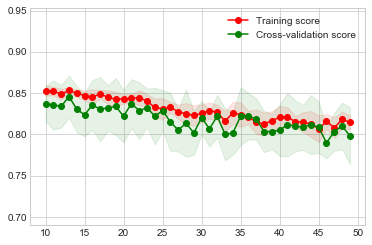

In [123]:
#min_samples_leaf
training_scores, validation_scores = validation_curve(rfc_best, X_trainmodel,y_trainmodel.values.ravel(),
                                                      param_name="min_samples_leaf", param_range=range(10, 50), cv=kfold)
plot_validation_curve(range(10, 50), training_scores, validation_scores)

Accuracy: 99.153
Classification report
             precision    recall  f1-score   support

          0       0.78      0.82      0.80       170
          1       0.72      0.67      0.70       121

avg / total       0.75      0.76      0.75       291

Confusion matrix
[[139  31]
 [ 40  81]]


'\nmodel = SelectFromModel(adaDTC, prefit=True)\ntrain_reduced = model.transform(X_trainmodel)\n\nprint("Reduced Training shape: {0}".format(train_reduced.shape))\ntest_reduced = model.transform(test_dataset)\nX_val_reduced = model.transform(X_val)\nprint("Reduced Test shape: {0}".format(test_reduced.shape))\nprint(test_reduced.shape)\n'

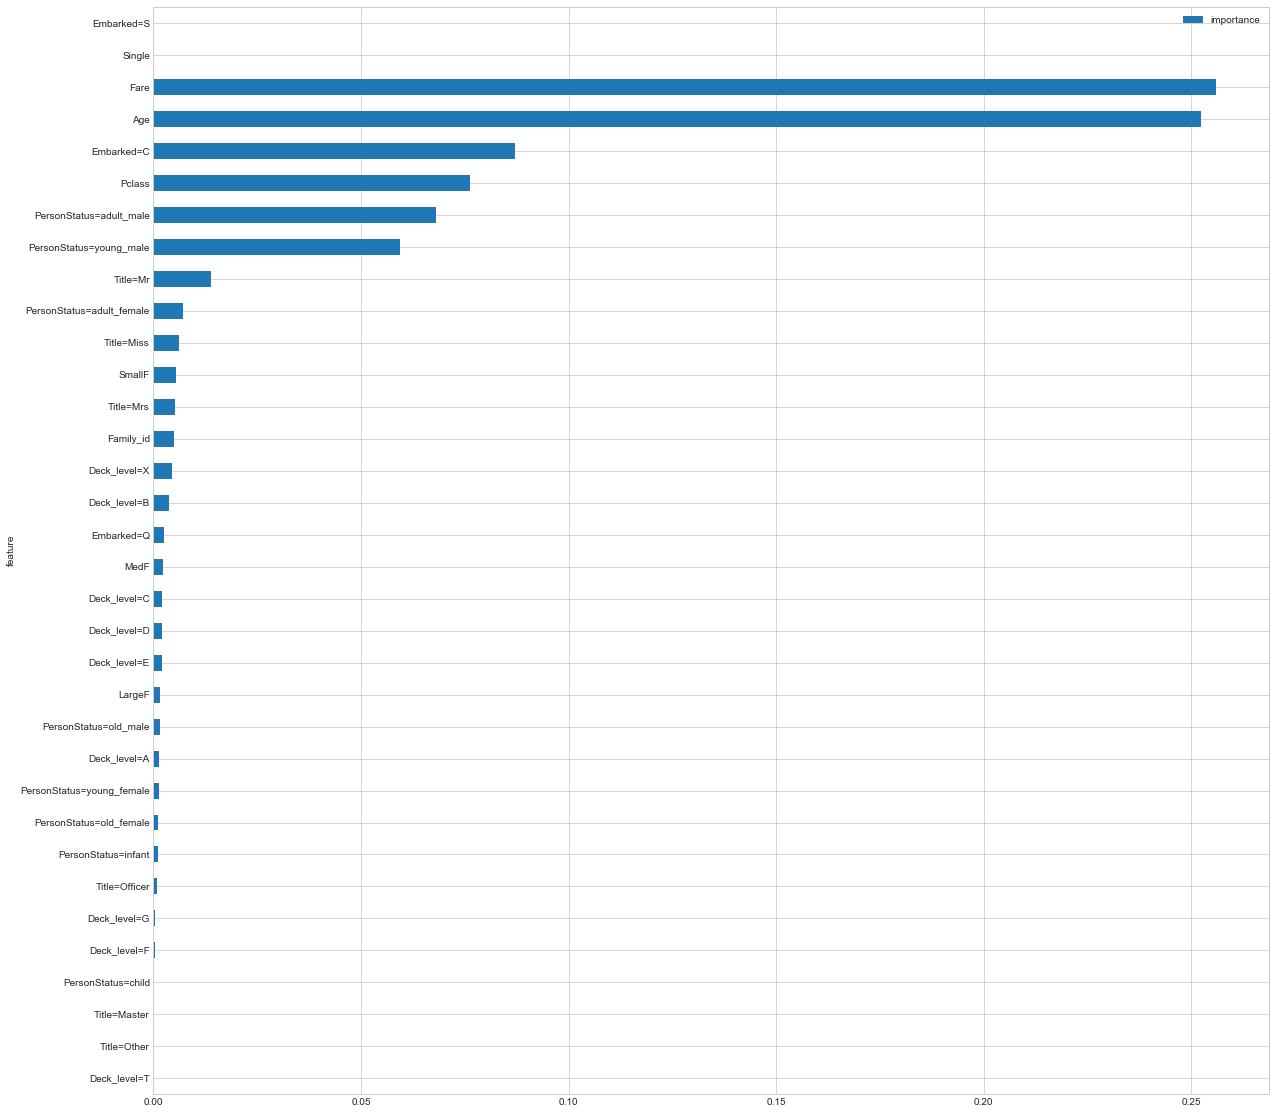

In [120]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
#DTC = DecisionTreeClassifier(criterion='gini')
            
adaDTC = AdaBoostClassifier(rfc)

adaDTC.fit(X_trainmodel, y_trainmodel.values.ravel())
result = adaDTC.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val,y_val,adaDTC, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

#y_pred_result=rfc.predict(test_dataset)
features = pd.DataFrame()
features['feature'] = X_trainmodel.columns
features['importance'] = adaDTC.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))


'''
model = SelectFromModel(adaDTC, prefit=True)
train_reduced = model.transform(X_trainmodel)

print("Reduced Training shape: {0}".format(train_reduced.shape))
test_reduced = model.transform(test_dataset)
X_val_reduced = model.transform(X_val)
print("Reduced Test shape: {0}".format(test_reduced.shape))
print(test_reduced.shape)
'''

In [79]:
#DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier()

ada_param_grid = {
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[500],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_trainmodel, y_trainmodel.values.ravel())

ada_best = gsadaDTC.best_estimator_
print(ada_best)


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:  4.2min finished


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
          n_estimators=500, random_state=None)


Accuracy: 85.085
Classification report
             precision    recall  f1-score   support

          0       0.79      0.86      0.83       170
          1       0.78      0.68      0.73       121

avg / total       0.79      0.79      0.78       291

Confusion matrix
[[147  23]
 [ 39  82]]


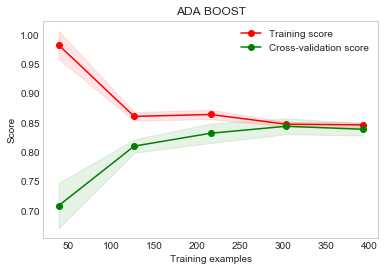

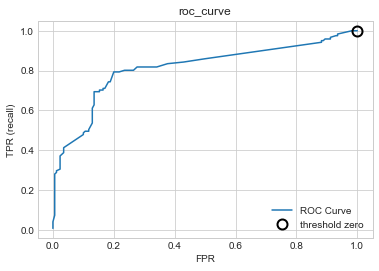

In [80]:
 
g = plot_learning_curve(ada_best,"ADA BOOST",X_trainmodel,y_trainmodel.values.ravel(),cv=None)
clf = ada_best 
clf.fit(X_trainmodel, y_trainmodel.values.ravel())

#g = plot_learning_curve(rfc,"RandomForest",X_trainmodel,y_trainmodel.values.ravel(),cv=None)
result = clf.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val,y_val,clf, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

plot_roc(X_val,y_val,clf)
#y_pred_result=clf.predict(test_reduced)

In [ ]:
extc = ExtraTreesClassifier(n_estimators =200,max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=10, min_weight_fraction_leaf=0.0)
             
extc.fit(X_trainmodel, y_trainmodel.values.ravel())
result = extc.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val,y_val,extc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

#y_pred_result=rfc.predict(test_dataset)
features = pd.DataFrame()
features['feature'] = X_trainmodel.columns
features['importance'] = extc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(extc, prefit=True)
train_reduced = model.transform(X_trainmodel)

print("Reduced Training shape: {0}".format(train_reduced.shape))
test_reduced = model.transform(test_dataset)
X_val_reduced = model.transform(X_val)
print("Reduced Test shape: {0}".format(test_reduced.shape))
print(test_reduced.shape)

In [ ]:
extc = ExtraTreesClassifier()
#class_weight={0: 0.618, 1: 0.382}

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": ['auto'],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[500],
              "criterion": ["gini"]}


gsextc  = GridSearchCV(extc ,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsextc.fit(X_trainmodel, y_trainmodel.values.ravel())

extc_best = gsextc.best_estimator_



In [ ]:
# Best score
print(gsextc.best_score_)

g = plot_learning_curve(extc_best,"ExtraTreesClassifier",X_trainmodel,y_trainmodel.values.ravel(),cv=kfold)
clf = extc_best 

clf.fit(X_trainmodel, y_trainmodel.values.ravel())
#g = plot_learning_curve(rfc,"RandomForest",X_trainmodel,y_trainmodel.values.ravel(),cv=None)
result = clf.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val,y_val,clf, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)
plot_roc(X_val,y_val,clf)

In [ ]:
from sklearn.svm import SVC
#"class_weight":[ {0:0.618,1:0.382}]
svmc = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000],
                 
                 }

gssvmc = GridSearchCV(svmc,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gssvmc.fit(X_trainmodel, y_trainmodel.values.ravel())

svmc_best = gssvmc.best_estimator_

# Best score
gssvmc.best_score_
print(svmc_best)

In [ ]:
svmc = svmc_best
svmc.fit(X_trainmodel, y_trainmodel.values.ravel())
g = plot_learning_curve(svmc,"SVM Classifier",X_trainmodel,y_trainmodel.values.ravel(),cv=kfold)
result = svmc.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val,y_val,svmc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)
plot_roc(X_val,y_val,svmc)

In [ ]:
# Gradient boosting tunning

gbc = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [500],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [5,10],
              'min_samples_leaf': [2,3],
              'max_features': ['auto'],
              
              }

gsgbc = GridSearchCV(gbc,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsgbc.fit(X_trainmodel, y_trainmodel.values.ravel())

gbc_best = gsgbc.best_estimator_

# Best score
gsgbc.best_score_

In [ ]:
gbc=gbc_best
gbc.fit(X_trainmodel, y_trainmodel.values.ravel())
g = plot_learning_curve(gbc,"Gradient Boosting",X_trainmodel,y_trainmodel.values.ravel(),cv=kfold)
result = gbc.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val,y_val,gbc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)
plot_roc(X_val,y_val,gbc)

In [ ]:
gbc_best

In [ ]:
titanic_vc = VotingClassifier(estimators=[('rfc', rfc_best), ('extc', extc_best),('svc', svmc_best),
                                          ('adac',ada_best),('gbc',gbc_best)], voting='soft', n_jobs=4)
titanic_vc.fit(X_trainmodel, y_trainmodel.values.ravel())
g = plot_learning_curve(titanic_vc,"VotingClassifier",X_trainmodel,y_trainmodel.values.ravel(),cv=None)
result = titanic_vc.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))
y_pred=measure_performance(X_val,y_val,titanic_vc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)
plot_roc(X_val,y_val,titanic_vc)


In [ ]:
y_pred_result=titanic_vc.predict(test_dataset)
FORMAT = '%Y%m%d%H%M%S'
timestamp=datetime.datetime.now().strftime(FORMAT)
filename ="submission_vc"+timestamp+"_out.csv"
submission = pd.DataFrame({
        "PassengerId": test_X["PassengerId"],
        "Survived": y_pred_result
    })
submission.to_csv(filename, index=False)

In [ ]:
from sklearn.base import clone, BaseEstimator, TransformerMixin, ClassifierMixin

class StackingClassifier(BaseEstimator,ClassifierMixin,TransformerMixin):
    def __init__(self,classifiers):
        self.classifiers  = classifiers
        self.meta_classifier = DecisionTreeClassifier()
      
    def  fit(self,X,y):
        for clf in self.classifiers:
            clf.fit(X,y)
        self.meta_classifier.fit(self._get_meta_features(X), y)
        return self
       
    def _get_meta_features(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers])
        return np.concatenate(probas, axis=1) 
    
    def predict(self, X):
        return self.meta_classifier.predict(self._get_meta_features(X))

    def predict_proba(self, X):
        return self.meta_classifier.predict_proba(self._get_meta_features(X))
            
        
        
        

In [ ]:
x

In [ ]:
base_classifiers = [rfc_best]#, extc_best,svmc_best,ada_best,gbc_best]
stacking_clf = StackingClassifier(base_classifiers)
stacking_clf.fit(X_trainmodel, y_trainmodel.values.ravel())
g = plot_learning_curve(stacking_clf,"Stacking Classifier",X_trainmodel,y_trainmodel.values.ravel(),cv=None)
print('Stacking classifier accuracy: %s' % stacking_clf.score(X_trainmodel, y_trainmodel.values))

y_pred=measure_performance(X_val,y_val,stacking_clf, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)
plot_roc(X_val,y_val,stacking_clf)


y_pred_result=stacking_clf.predict(test_dataset)
timestamp=datetime.datetime.now().strftime(FORMAT)
filename ="submission_stk"+timestamp+"_out.csv"
submission = pd.DataFrame({
        "PassengerId": test_X["PassengerId"],
        "Survived": y_pred_result
    })
submission.to_csv(filename, index=False)